<a href="https://colab.research.google.com/github/hifsakazmi/xai_ml_robot_telemetry/blob/main/AAI_ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 - Data Preprocessing


### 1.1 Loading Data and Initial Exploration

#### Download Dataset

In [ ]:
import os
import zipfile
import gdown

In [ ]:
def download_dataset(dataset_link):
  local_path = "/content"  # This is where files get extracted
  zip_path = "/content/drone_dataset.zip"
  dataset_path = "/content/drone_dataset"

  if not os.path.exists(dataset_path):
    print("Downloading dataset from Google Drive...")

    # Download the file
    print("Downloading zip file...")
    gdown.download(dataset_link, zip_path, quiet=False)

    # Check if download was successful
    if not os.path.exists(zip_path):
      raise FileNotFoundError(f"Download failed! Zip file not found at {zip_path}")

    # Extract the zip file
    print("Extracting dataset...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(local_path)

    os.remove(zip_path)
    print("Dataset downloaded and extracted successfully!")
  else:
    print("Dataset already exists!")
  return dataset_path

In [ ]:
dataset_link = 'https://drive.google.com/uc?id=1RLkIm9UwxqQiFXrR96ixikb4jYCIBQau'
dataset_path = download_dataset(dataset_link)
os.listdir(dataset_path)



Dataset already exists!


['NormalFlight', 'Dos-Drone', 'ReadMeForDataSet.txt', 'Malfunction-Drone']

#### Load Data in Dataframes

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
global_flight_id = 0
def load_all_csvs_from_dir(directory_path):
  global global_flight_id
  all_dataframes = []
  for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
      filepath = os.path.join(directory_path, filename)
      try:
        df = pd.read_csv(filepath)

        # Added flight_id to data loaded from each CSV to avoid data leaking
        df['flight_id'] = global_flight_id
        global_flight_id += 1

        all_dataframes.append(df)
      except Exception as e:
        print(f"Error reading {filename}: {e}")

  if all_dataframes:
    return pd.concat(all_dataframes, ignore_index=True)
  else:
    print(f"No CSV files found in '{directory_path}'. Returning empty DataFrame.")
    return pd.DataFrame()

#### Load Normal Flight Data

In [ ]:
normal_flight_path = os.path.join(dataset_path, 'NormalFlight')
print(f"Loading CSVs from: {normal_flight_path}")

# Assuming there are CSVs inside 'NormalFlight' directory
df_normal = load_all_csvs_from_dir(normal_flight_path)

if not df_normal.empty:
  display(df_normal.head())
else:
  print("No CSVs were loaded or the DataFrame is empty.")

Loading CSVs from: /content/drone_dataset/NormalFlight


,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_manual_input,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB,flight_id
0,0,1.729315e+09,137,0,33.707308,73.019849,1.25,1.729315e+09,14916.0,1.729315e+09,...,1.0,5.0,1.729315e+09,1.0,-40.0,1.729315e+09,9.6,1.729315e+09,5.9,0
1,1,1.729315e+09,139,0,33.707308,73.019849,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,1.729315e+09,141,0,33.707308,73.019849,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,1.729315e+09,147,0,33.707308,73.019849,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,1.729315e+09,155,0,33.707308,73.019849,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
df_normal.shape

(49800, 80)

#### Load Malfunction Drone Data

In [ ]:
malfunc_path = os.path.join(dataset_path, 'Malfunction-Drone')
print(f"Loading CSVs from: {malfunc_path}")

# Assuming there are CSVs inside 'Malfunction-Drone' directory
df_malfunction = load_all_csvs_from_dir(malfunc_path)

if not df_malfunction.empty:
  display(df_malfunction.head())
else:
  print("No CSVs were loaded or the DataFrame is empty.")

Loading CSVs from: /content/drone_dataset/Malfunction-Drone


,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_manual_input,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB,flight_id
0,0,1.729688e+09,59,0,33.63709,72.991302,1.25,1.729688e+09,21351.0,1.729688e+09,...,1.0,5.0,1.729688e+09,0.8,-54.0,1.729688e+09,7.3,1.729688e+09,7.6,4
1,1,1.729688e+09,66,0,33.63709,72.991303,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,2,1.729688e+09,369,0,33.63709,72.991303,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,3,1.729688e+09,2111,0,33.63709,72.991303,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,4,1.729688e+09,2112,0,33.63709,72.991303,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [ ]:
df_malfunction.shape

(18030, 80)

#### Load DoS Drone Data

In [ ]:
dos_drone_path = os.path.join(dataset_path, 'Dos-Drone')
print(f"Loading CSVs from: {dos_drone_path}")

# Assuming there are CSVs inside 'DoS-Drone' directory
df_dos = load_all_csvs_from_dir(dos_drone_path)

if not df_dos.empty:
  display(df_dos.head())
else:
  print("No CSVs were loaded or the DataFrame is empty.")

Loading CSVs from: /content/drone_dataset/Dos-Drone


,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_manual_input,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB,flight_id
0,0,1.729787e+09,570,0,33.636530,72.99146,1.279,1.729787e+09,12473.0,1.729787e+09,...,1.0,5.0,1.729787e+09,0.642857,-65.0,1.729787e+09,3.9,1.729787e+09,6.5,6
1,1,1.729787e+09,664,0,33.636530,72.99146,1.279,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
2,2,1.729787e+09,1177,0,33.636530,72.99146,1.279,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
3,3,1.729787e+09,1374,0,33.636529,72.99146,1.272,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
4,4,1.729787e+09,1417,0,33.636529,72.99146,1.272,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


In [ ]:
df_dos.shape

(19587, 80)

In [ ]:
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49800 entries, 0 to 49799
Data columns (total 80 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   S.No                                           49800 non-null  int64  
 1   setpoint_raw-global_Time                       49800 non-null  float64
 2   setpoint_raw-global_header.seq                 49800 non-null  int64  
 3   setpoint_raw-global_header.stamp.secs          49800 non-null  int64  
 4   setpoint_raw-global_latitude                   49800 non-null  float64
 5   setpoint_raw-global_longitude                  49800 non-null  float64
 6   setpoint_raw-global_altitude                   49800 non-null  float64
 7   battery_Time                                   2696 non-null   float64
 8   battery_header.seq                             2696 non-null   float64
 9   battery_header.stamp.secs                      269

#### Add Label to each dataframe

Before combining data in one dataframe for analysis, I am adding 'label' column to indicate type of data to prevent data leaking in analysis.


In [ ]:
df_normal['label'] = 'normal'

df_dos['label'] = 'dos'

df_malfunction['label'] = 'malfunction'

#### Combine Data in one dataframe for Analysis



In [ ]:
df_drones =  pd.concat([df_normal, df_malfunction, df_dos], axis=0, ignore_index=True, sort=False)

#### Observations
* The dataset contains three subfolders **NormalFlight**, **Malfunction-Drone** and **Dos-Drone**
* Each subfolder contains raw data from drones in CSV format.
* Data in each CSV has **79 columns** documenting the following information from different drone sensors
  * Setpoint: Where the drone is supposed to go (target GPS, altitude).
  * Battery: voltage, current, percentage, temperature.
  * Global Position: Where the drone actually is (local X,Y,Z and GPS lat/long) and its speed.
  * IMU Data: How the drone is tilted (orientation) and its rotation speed.
  * RC Out: Control signals sent to the motors.
  * VFR HUD: Pilot display info: speed, altitude, heading, climb rate.
  * State: System status: armed, guided, connected, etc. (1=True, 0=False).
  * RSSI: Signal strength for the radio control link.
  * System Resources: Computer CPU and RAM usage.
* All columns are continuous except **state***. Those are boolean or have limited discrete values
* Number of rows in each category of drone data:
  * **Normal Flight**: 49,800
  * **Malfunction Drone**: 18,030
  * **Dos Drone**: 19,587   

### 1.2 Null Values and Duplicate Handling



#### 1.2.1 Visualize Null Values

**Missing Values in Normal Flight**

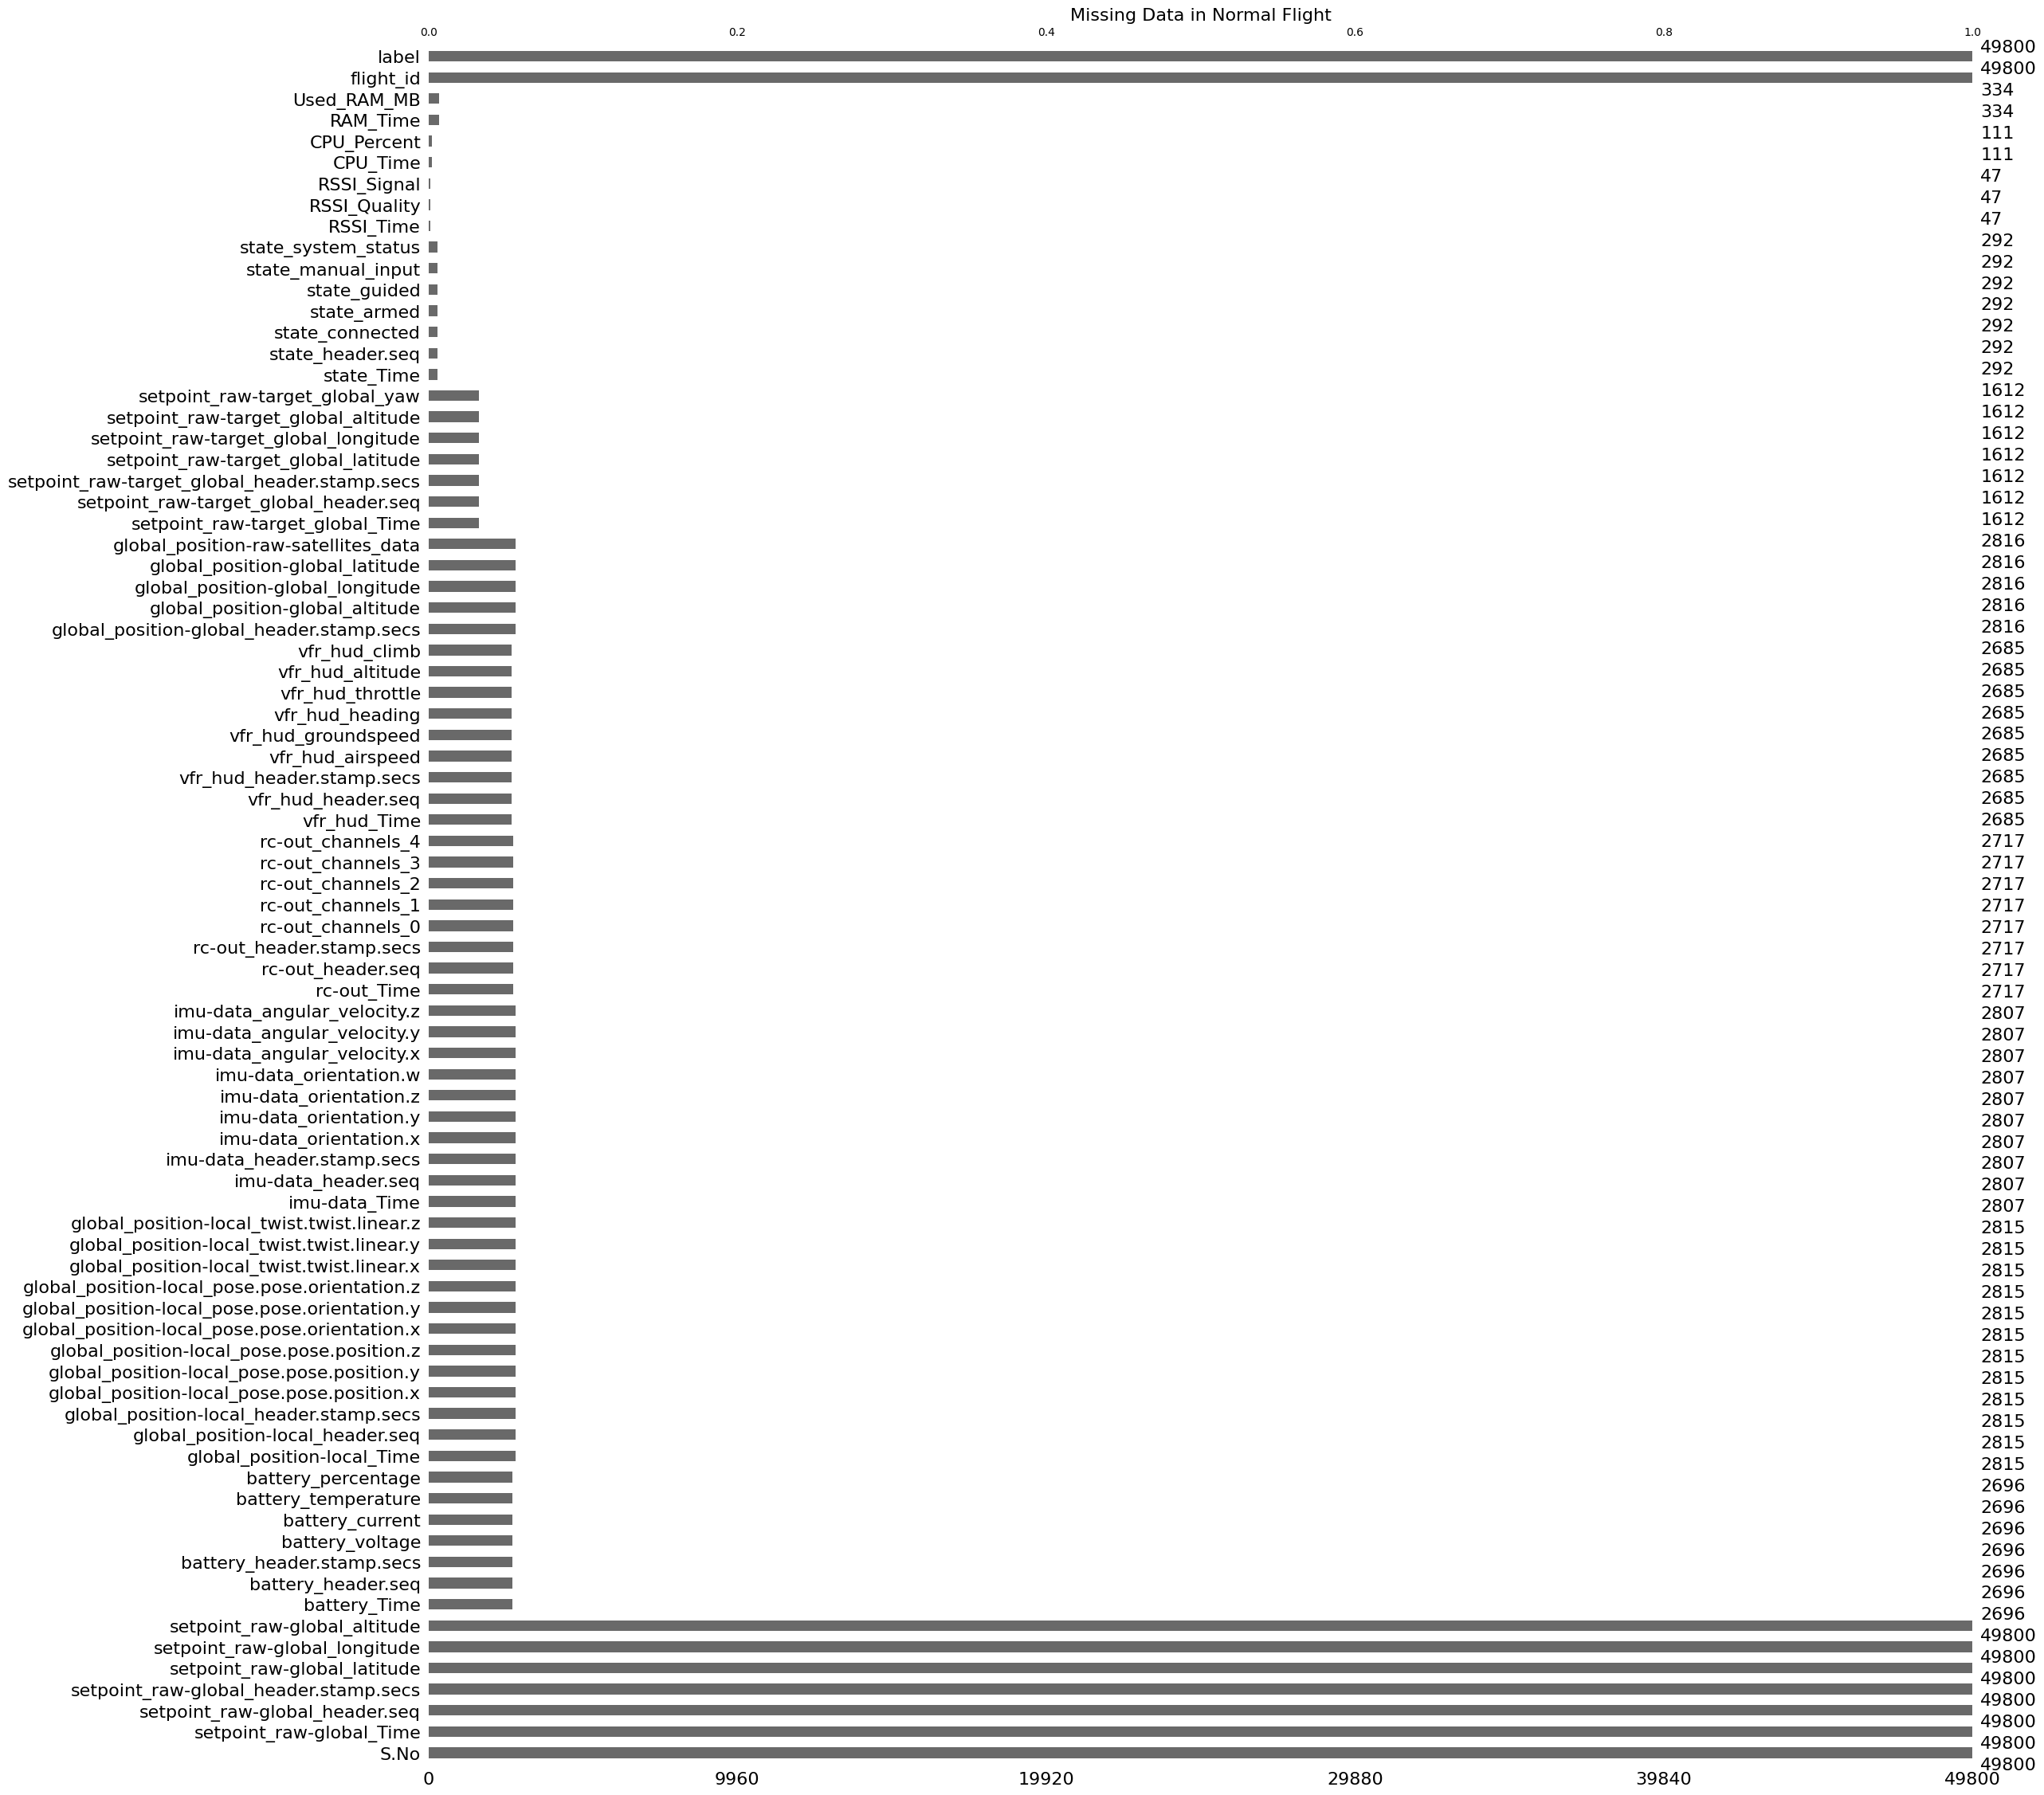

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

msno.bar(df_normal)
plt.title('Missing Data in Normal Flight', fontsize=16)
plt.show()

**Missing Values in Malfunction Data**

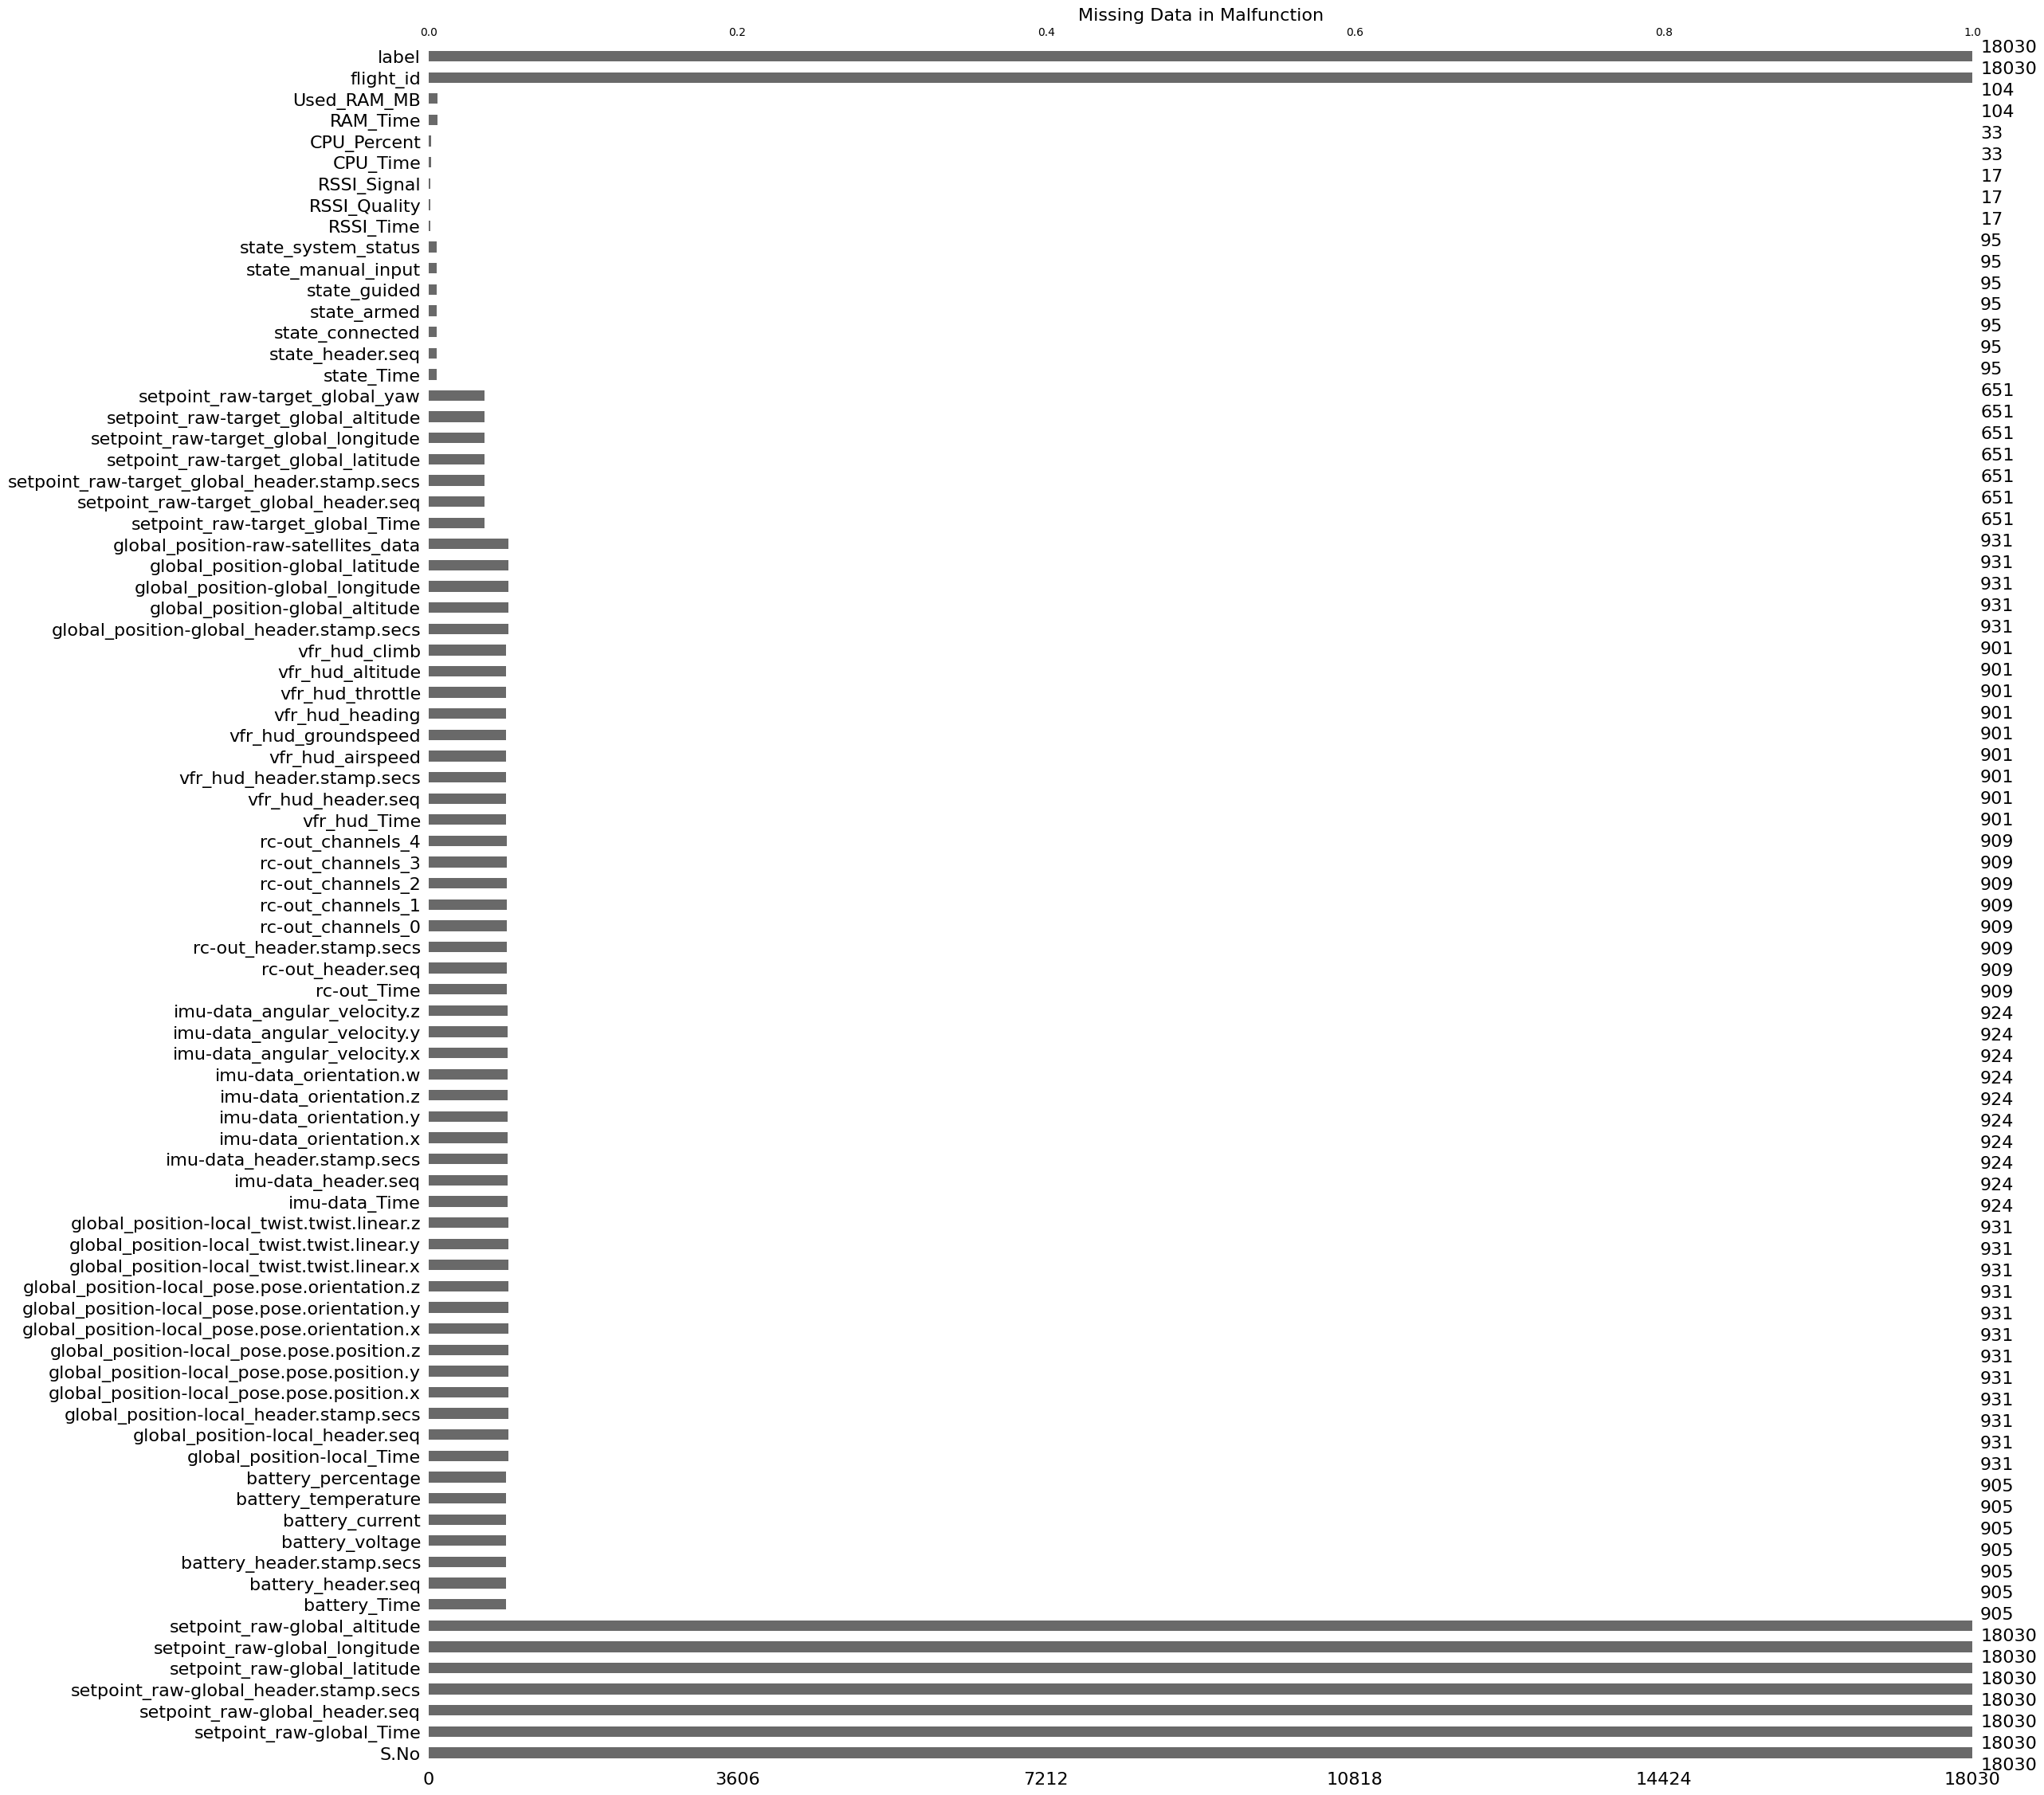

In [ ]:
msno.bar(df_malfunction)
plt.title('Missing Data in Malfunction', fontsize=16)
plt.show()

**Missing Values in Dos Data**

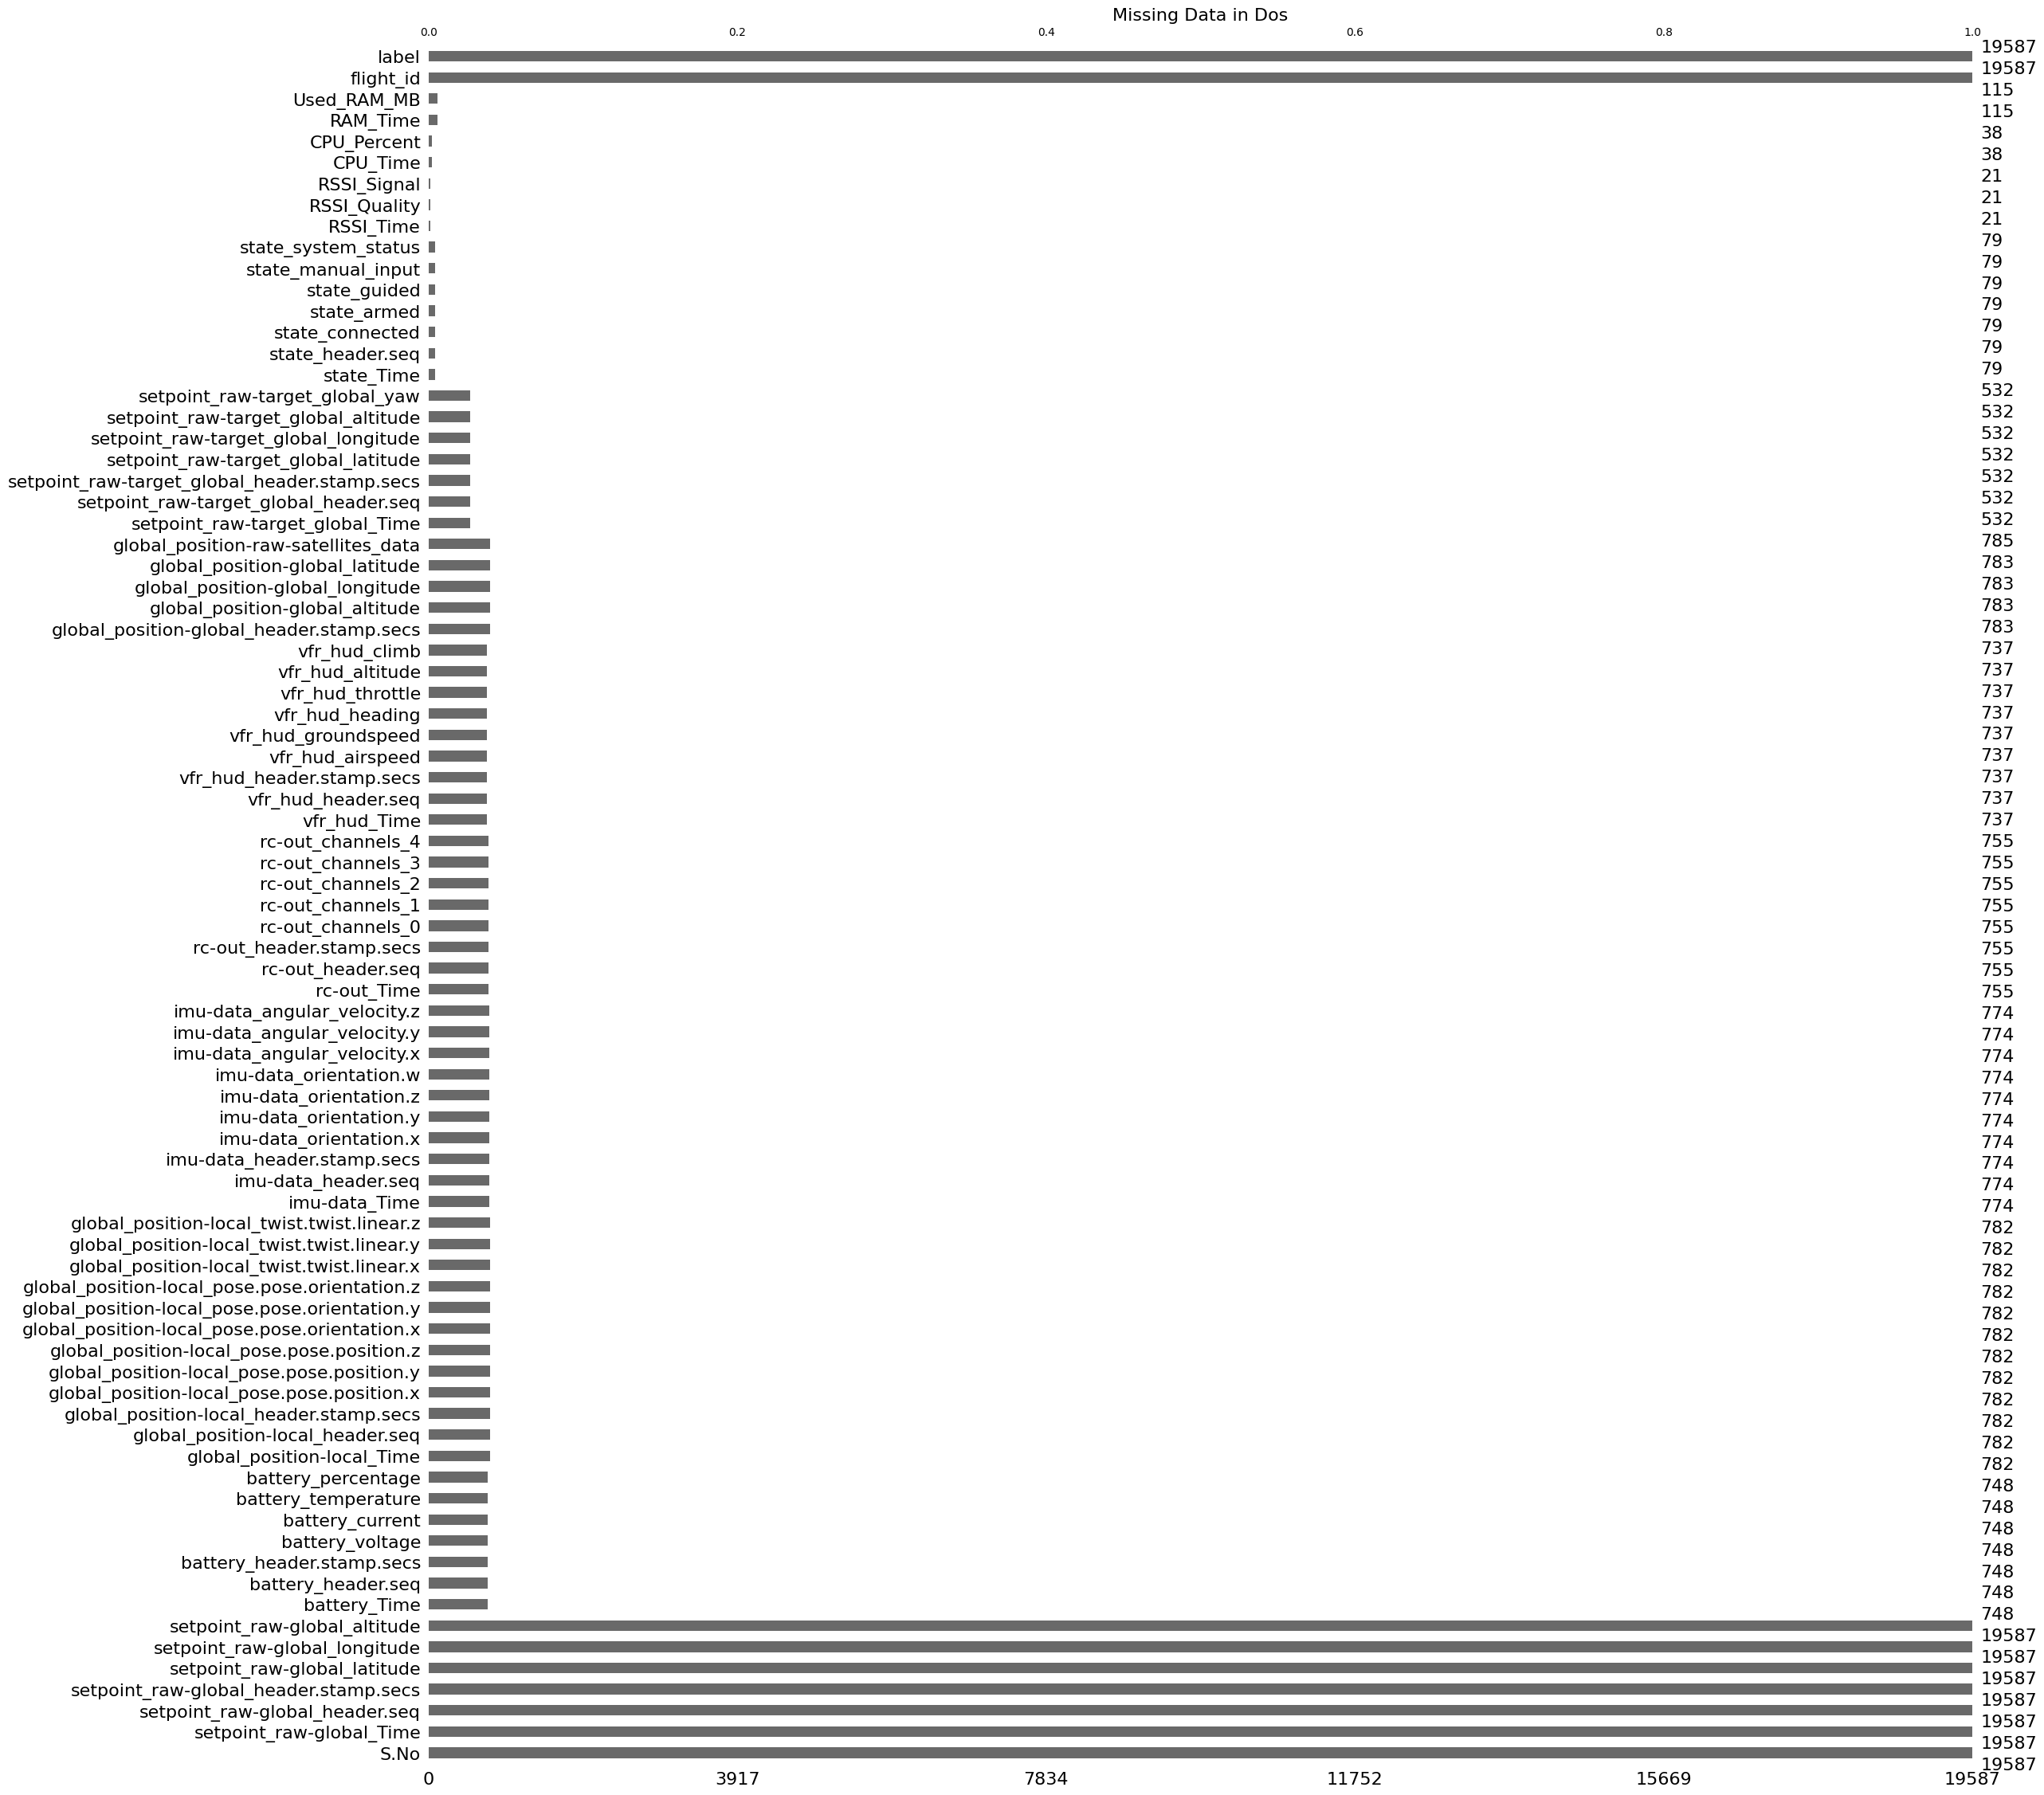

In [ ]:
msno.bar(df_dos)
plt.title('Missing Data in Dos', fontsize=16)
plt.show()

**Observation:**

* These bar graphs show a lot of data sparsity. There are huge stretches of empty columns in many rows. However, this is normal behavior in asynchronous telemetry datasets.
* More than **95%** data only has setpoint information.

#### 1.2.2 Redundant Data Analysis



**Format Timestamps**

The timestamps in this dataset are in Unix epoch seconds. Before we move forward with null value handling, it is best to convert timestamps to DateTime objects.

In [ ]:
def format_timestamp_cols(df):
  for col in df.columns:
    if col.endswith('Time') or col.endswith('secs'):
      # First check if any values are 0 or near 0
      mask = df[col].astype(float) < 1
      # Convert all
      df[col] = pd.to_datetime(df[col], unit='s', errors='coerce')
      # Set problematic ones to NaT
      df.loc[mask, col] = pd.NaT

In [ ]:
format_timestamp_cols(df_drones)

In [ ]:
df_drones.head()

,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB,flight_id,label
0,0,2024-10-19 05:19:29.110145092,137,NaT,33.707308,73.019849,1.25,2024-10-19 05:19:06.615720987,14916.0,2024-10-19 05:19:06,...,5.0,2024-10-19 05:19:12.620326996,1.0,-40.0,2024-10-19 05:19:13,9.6,2024-10-19 05:19:16.838260889,5.9,0,normal
1,1,2024-10-19 05:19:29.122611761,139,NaT,33.707308,73.019849,1.25,NaT,NaN,NaT,...,NaN,NaT,NaN,NaN,NaT,NaN,NaT,NaN,0,normal
2,2,2024-10-19 05:19:29.122659206,141,NaT,33.707308,73.019849,1.25,NaT,NaN,NaT,...,NaN,NaT,NaN,NaN,NaT,NaN,NaT,NaN,0,normal
3,3,2024-10-19 05:19:29.123682499,147,NaT,33.707308,73.019849,1.25,NaT,NaN,NaT,...,NaN,NaT,NaN,NaN,NaT,NaN,NaT,NaN,0,normal
4,4,2024-10-19 05:19:29.123990297,155,NaT,33.707308,73.019849,1.25,NaT,NaN,NaT,...,NaN,NaT,NaN,NaN,NaT,NaN,NaT,NaN,0,normal


In [ ]:
df_drones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87417 entries, 0 to 87416
Data columns (total 81 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   S.No                                           87417 non-null  int64         
 1   setpoint_raw-global_Time                       87417 non-null  datetime64[ns]
 2   setpoint_raw-global_header.seq                 87417 non-null  int64         
 3   setpoint_raw-global_header.stamp.secs          0 non-null      datetime64[ns]
 4   setpoint_raw-global_latitude                   87417 non-null  float64       
 5   setpoint_raw-global_longitude                  87417 non-null  float64       
 6   setpoint_raw-global_altitude                   87417 non-null  float64       
 7   battery_Time                                   4349 non-null   datetime64[ns]
 8   battery_header.seq                             4349 non-

##### List of Redundant Columns

In [ ]:
# 1. Index/ID columns
cols_to_drop = ['S.No']

# 2. Redundant sequence numbers (all .seq columns)
cols_to_drop.extend([col for col in df_drones.columns if '.seq' in col])

# 3. Redundant timestamps (keep only _Time columns)
cols_to_drop.extend([col for col in df_drones.columns if 'stamp.secs' in col])

# 4. Redundant orientation (Using imu-data instead)
cols_to_drop.extend(['global_position-local_pose.pose.orientation.x',
'global_position-local_pose.pose.orientation.y',
'global_position-local_pose.pose.orientation.z',
# 5. Constant Value
'global_position-raw-satellites_data'])

##### Drop Redundant Columns

In [ ]:
print(f"Original: {len(df_drones.columns)} columns")
cols_count_before = len(df_drones.columns)

# Drop Columns
df_drones = df_drones.drop(columns=cols_to_drop)

cols_count_after = len(df_drones.columns)
print(f"After drop: {len(df_drones.columns)} columns")
print(f"Dropped: {cols_count_before - cols_count_after} columns")

Original: 81 columns
After drop: 60 columns
Dropped: 21 columns


In [ ]:
df_drones.columns

Index(['setpoint_raw-global_Time', 'setpoint_raw-global_latitude',
       'setpoint_raw-global_longitude', 'setpoint_raw-global_altitude',
       'battery_Time', 'battery_voltage', 'battery_current',
       'battery_temperature', 'battery_percentage',
       'global_position-local_Time',
       'global_position-local_pose.pose.position.x',
       'global_position-local_pose.pose.position.y',
       'global_position-local_pose.pose.position.z',
       'global_position-local_twist.twist.linear.x',
       'global_position-local_twist.twist.linear.y',
       'global_position-local_twist.twist.linear.z', 'imu-data_Time',
       'imu-data_orientation.x', 'imu-data_orientation.y',
       'imu-data_orientation.z', 'imu-data_orientation.w',
       'imu-data_angular_velocity.x', 'imu-data_angular_velocity.y',
       'imu-data_angular_velocity.z', 'rc-out_Time', 'rc-out_channels_0',
       'rc-out_channels_1', 'rc-out_channels_2', 'rc-out_channels_3',
       'rc-out_channels_4', 'vfr_hud_Time', '

#### 1.2.3 Null Values Imputation

To handle null values, Forward Fill (and backward fill where needed) will be applied. In my opinion, this imputation technique is better than Deletion and Interpolation for this data because:
* Deletion would discard 95% of our sparse data, losing critical anomaly signals
* Interpolation creates artificial smoothness that hide the abrupt changes making it difficult to detected cyberattacks and system failures.



In [ ]:
def impute_drone_data(df):
    df = df.copy()
    df = df.sort_values(['flight_id', 'setpoint_raw-global_Time']).copy()

    # 1. First, handle datetime columns with simpler approach
    datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

    for col in datetime_cols:
        # Simple forward/backward fill
        df[col] = df.groupby('flight_id')[col].ffill().bfill()

    # 2. Fill any remaining datetime NaTs with the most common timestamp
    primary_time = 'setpoint_raw-global_Time'
    for col in datetime_cols:
        if col != primary_time:
            df[col] = df[col].fillna(df[primary_time])

    # 3. Impute numeric sensor data
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if 'label' in numeric_cols:
        numeric_cols.remove('label')

    for col in numeric_cols:
        # Fill within flights
        filled = df.groupby('flight_id')[col].ffill().bfill()
        df[col] = filled.fillna(df[col].median())

    return df

df_drones_imputed = impute_drone_data(df_drones)

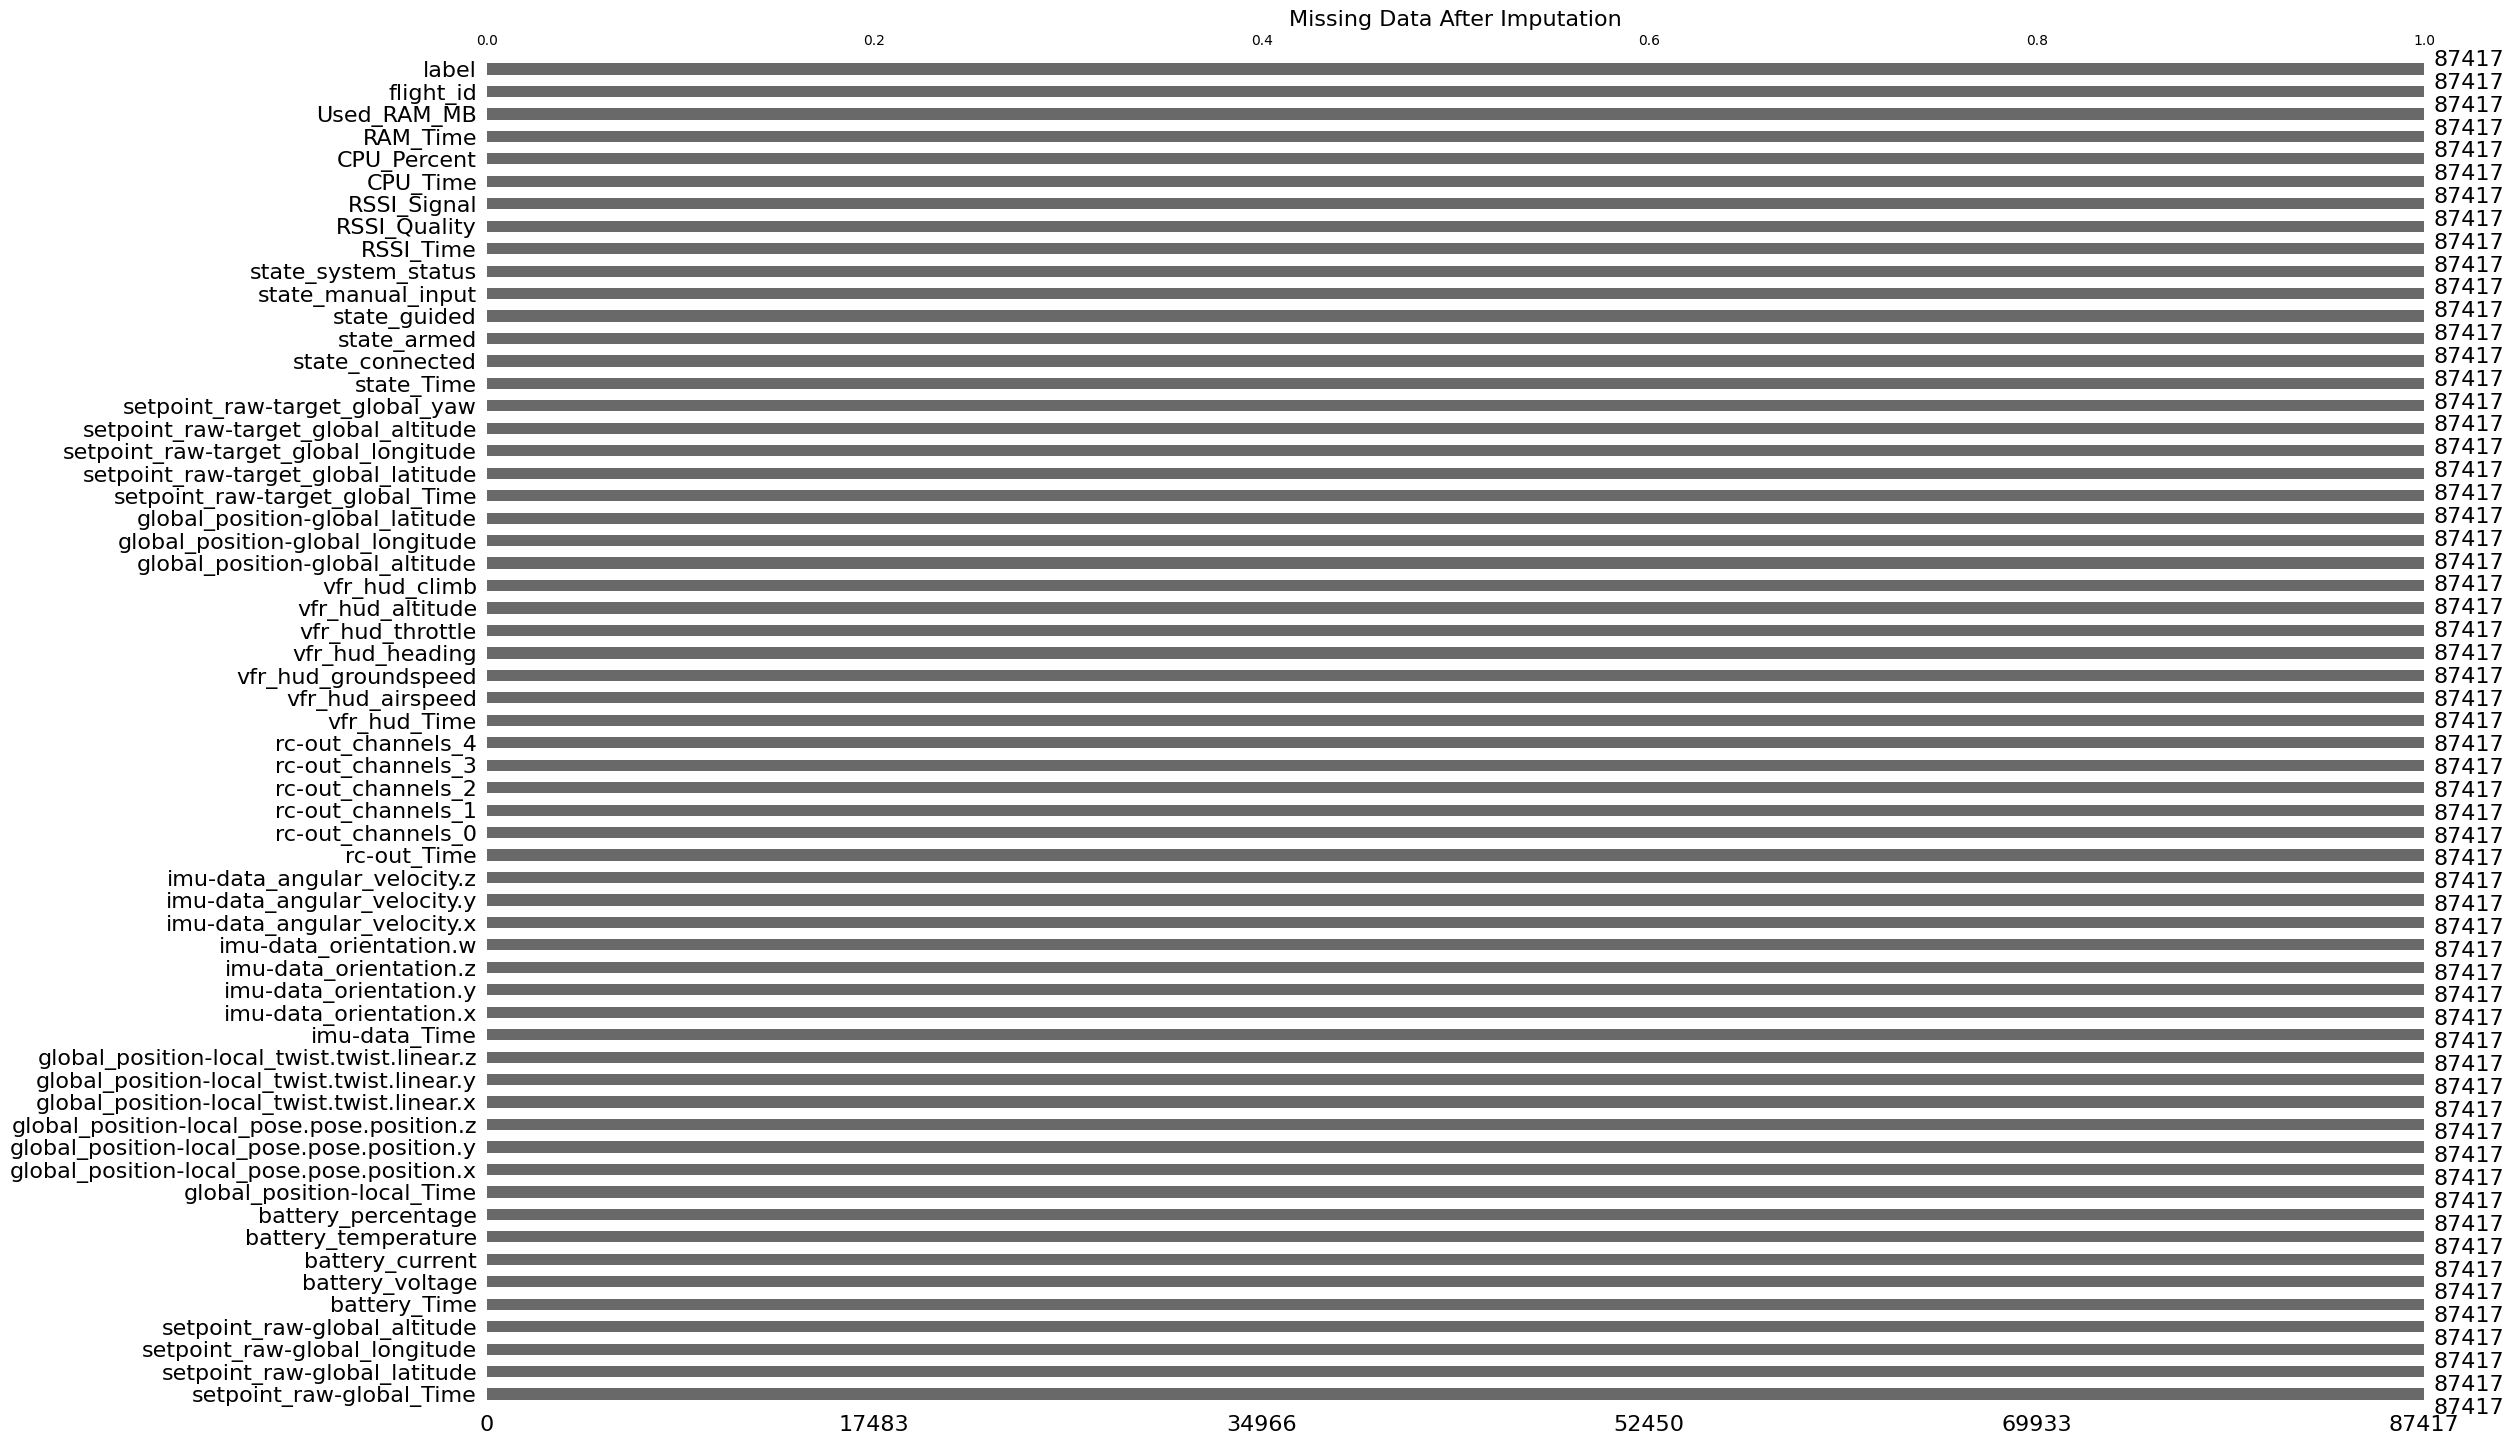

In [ ]:
msno.bar(df_drones_imputed)
plt.title('Missing Data After Imputation', fontsize=16)
plt.show()

### 1.3 Outlier Detection

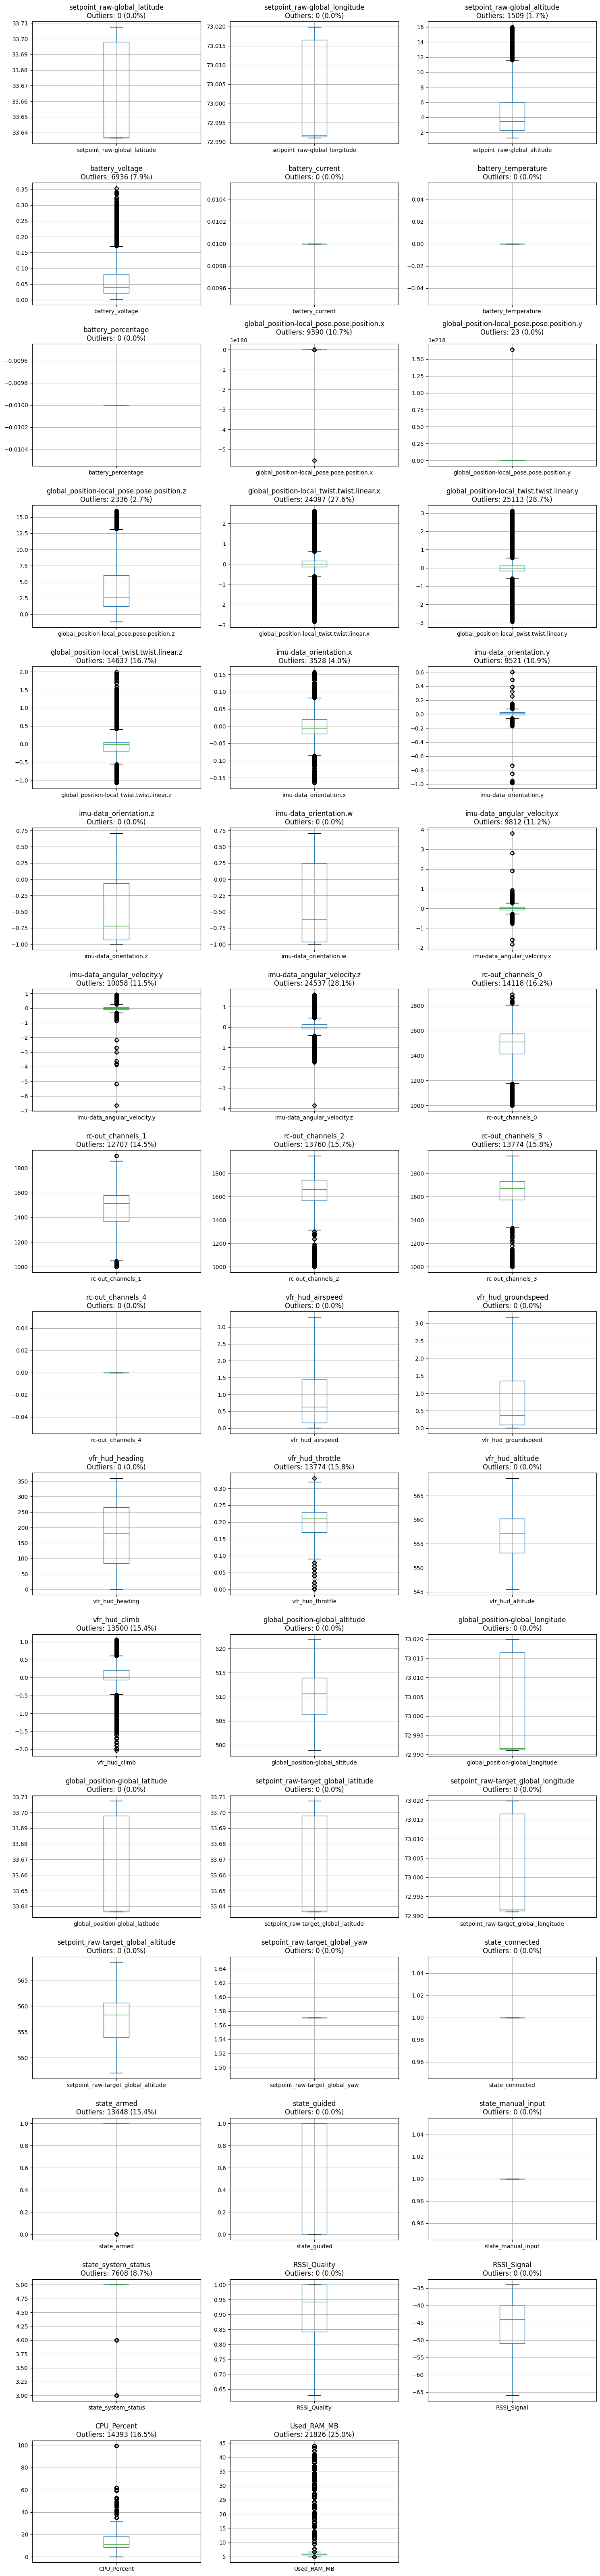

Outlier Summary:
setpoint_raw-global_altitude: 1509 outliers (1.7%)
battery_voltage: 6936 outliers (7.9%)
global_position-local_pose.pose.position.x: 9390 outliers (10.7%)
global_position-local_pose.pose.position.y: 23 outliers (0.0%)
global_position-local_pose.pose.position.z: 2336 outliers (2.7%)
global_position-local_twist.twist.linear.x: 24097 outliers (27.6%)
global_position-local_twist.twist.linear.y: 25113 outliers (28.7%)
global_position-local_twist.twist.linear.z: 14637 outliers (16.7%)
imu-data_orientation.x: 3528 outliers (4.0%)
imu-data_orientation.y: 9521 outliers (10.9%)
imu-data_angular_velocity.x: 9812 outliers (11.2%)
imu-data_angular_velocity.y: 10058 outliers (11.5%)
imu-data_angular_velocity.z: 24537 outliers (28.1%)
rc-out_channels_0: 14118 outliers (16.2%)
rc-out_channels_1: 12707 outliers (14.5%)
rc-out_channels_2: 13760 outliers (15.7%)
rc-out_channels_3: 13774 outliers (15.8%)
vfr_hud_throttle: 13774 outliers (15.8%)
vfr_hud_climb: 13500 outliers (15.4%)
state_

In [ ]:
def detect_outliers_iqr(df, column):
    """Detect outliers using IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def visualize_outliers(df, columns_to_check=None, n_cols=3):
    """Create box plots for outlier visualization."""
    if columns_to_check is None:
        columns_to_check = df.select_dtypes(include=[np.number]).columns.tolist()
        if 'label' in columns_to_check:
            columns_to_check.remove('label')
        if 'flight_id' in columns_to_check:
            columns_to_check.remove('flight_id')

    n_rows = (len(columns_to_check) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
    axes = axes.flatten()

    for idx, col in enumerate(columns_to_check[:len(axes)]):
        df.boxplot(column=col, ax=axes[idx])
        outliers, lower, upper = detect_outliers_iqr(df, col)
        axes[idx].set_title(f'{col}\nOutliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)')

    # Hide unused subplots
    for idx in range(len(columns_to_check), len(axes)):
        axes[idx].set_visible(False)

    plt.tight_layout()
    plt.show()

    # Print outlier statistics
    print("Outlier Summary:")
    for col in columns_to_check:
        outliers, _, _ = detect_outliers_iqr(df, col)
        if len(outliers) > 0:
            print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")

# Apply to your data
visualize_outliers(df_drones_imputed)

In [ ]:
df_drones_imputed.describe().T

/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,min,25%,50%,75%,max,std
setpoint_raw-global_Time,87417,2024-10-22 10:34:45.116970752,2024-10-19 05:19:29,2024-10-20 06:21:52.595577600,2024-10-23 12:21:54.521636096,2024-10-24 16:09:08.157831936,2024-10-25 16:30:44.668231010,NaN
setpoint_raw-global_latitude,87417.0,33.664535,33.636529,33.636642,33.637122,33.69788,33.707439,0.03181
setpoint_raw-global_longitude,87417.0,73.002702,72.991018,72.991309,72.991634,73.016555,73.019869,0.012993
setpoint_raw-global_altitude,87417.0,4.374865,1.25,2.269,3.451,5.978,15.985,2.820141
battery_Time,87417,2024-10-22 10:34:45.908669184,2024-10-19 05:19:06.615720987,2024-10-20 06:21:54.692741120,2024-10-23 12:22:01.857448704,2024-10-24 16:08:58.122250240,2024-10-25 16:31:02.815543175,NaN
battery_voltage,87417.0,0.063,0.002,0.021,0.039,0.081,0.353,0.061661
battery_current,87417.0,0.01,0.01,0.01,0.01,0.01,0.01,0.0
battery_temperature,87417.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
battery_percentage,87417.0,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0.0
global_position-local_Time,87417,2024-10-22 10:34:44.985533696,2024-10-19 05:19:06.605420828,2024-10-20 06:21:54.374598400,2024-10-23 12:22:01.941233664,2024-10-24 16:08:53.387116288,2024-10-25 16:31:02.800486565,NaN


**Observations:**
* As can be seen in the table above there are some extreme outliers in **global_position-local_pose.pose.position.x** and **global_position-local_pose.pose.position.y** that should be clipped.
* Outlier in columns CPU_Percent, Used_RAM_MB, RSSI_Signal, battery_voltage, state_armed might be due to malfunction or Dos attack, so adding flags for these instead of removing them.

##### Outlier Treatment

In [ ]:
def treat_outliers_drone(df):
  df_treated = df.copy()

  # 1. Clipping outliers in Velocity values
  vel_limits = {'x': (-3, 3), 'y': (-3, 3), 'z': (-1.5, 1.5)}

  df_treated['global_position-local_twist.twist.linear.x'] = df_treated['global_position-local_twist.twist.linear.x'].clip(*vel_limits['x'])
  df_treated['global_position-local_twist.twist.linear.y'] = df_treated['global_position-local_twist.twist.linear.y'].clip(*vel_limits['y'])
  df_treated['global_position-local_twist.twist.linear.z'] = df_treated['global_position-local_twist.twist.linear.z'].clip(*vel_limits['z'])

  # 2. POSITION: Flight-relative, not global
  pos_cols = ['global_position-local_pose.pose.position.x',
              'global_position-local_pose.pose.position.y',
              'global_position-local_pose.pose.position.z']

  for col in pos_cols:
    # Replace infinity with NaN
    df_treated[col] = df_treated[col].replace([np.inf, -np.inf], np.nan)

    # Remove values beyond physical limits
    # Clip to ±1000 meters from flight median
    flight_median = df_treated.groupby('flight_id')[col].transform('median')
    df_treated[col] = df_treated[col].clip(flight_median - 1000, flight_median + 1000)

    # Forward fill any NaN created by infinity removal
    df_treated[col] = df_treated.groupby('flight_id')[col].ffill().bfill()

  # 3. OUTLIER FLAGS
  flag_cols = ['CPU_Percent', 'Used_RAM_MB', 'RSSI_Signal',
               'battery_voltage']

  for col in flag_cols:
    Q1 = df_treated[col].quantile(0.25)
    Q3 = df_treated[col].quantile(0.75)
    IQR = Q3 - Q1
    is_outlier = (df_treated[col] < (Q1 - 1.5*IQR)) | (df_treated[col] > (Q3 + 1.5*IQR))
    df_treated[f'{col}_outlier'] = is_outlier.astype(int)

  return df_treated

df_drones_clipped = treat_outliers_drone(df_drones_imputed)

In [ ]:
df_drones_clipped.columns

Index(['setpoint_raw-global_Time', 'setpoint_raw-global_latitude',
       'setpoint_raw-global_longitude', 'setpoint_raw-global_altitude',
       'battery_Time', 'battery_voltage', 'battery_current',
       'battery_temperature', 'battery_percentage',
       'global_position-local_Time',
       'global_position-local_pose.pose.position.x',
       'global_position-local_pose.pose.position.y',
       'global_position-local_pose.pose.position.z',
       'global_position-local_twist.twist.linear.x',
       'global_position-local_twist.twist.linear.y',
       'global_position-local_twist.twist.linear.z', 'imu-data_Time',
       'imu-data_orientation.x', 'imu-data_orientation.y',
       'imu-data_orientation.z', 'imu-data_orientation.w',
       'imu-data_angular_velocity.x', 'imu-data_angular_velocity.y',
       'imu-data_angular_velocity.z', 'rc-out_Time', 'rc-out_channels_0',
       'rc-out_channels_1', 'rc-out_channels_2', 'rc-out_channels_3',
       'rc-out_channels_4', 'vfr_hud_Time', '

### 1.4 Feature Engineering and Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def feature_engineering_with_scaling(df):
    """
    Complete feature engineering pipeline for drone anomaly detection.
    Returns: df_engineered (all features), df_cnn (scaled sequences), df_xgb (tabular)
    """
    df_fe = df.copy()
    # ============================================
    # STEP 0: CONVERT STRING LABELS TO INTEGERS
    # ============================================
    print("Step 0: Converting labels to integers...")

    # Map string labels to integers
    label_map = {'normal': 0, 'dos': 1, 'malfunction': 2}
    df_fe['label_int'] = df_fe['label'].map(label_map)

    # Keep original label for reference
    df_fe['label_str'] = df_fe['label']

    # ============================================
    # STEP 1: BASIC FEATURE ENGINEERING
    # ============================================
    print("Step 1: Basic feature engineering...")

    # 1. Time since flight start (normalized to seconds)
    df_fe['time_since_start_sec'] = df_fe.groupby('flight_id')['setpoint_raw-global_Time'].transform(
        lambda x: (x - x.min()).dt.total_seconds() if pd.api.types.is_datetime64_any_dtype(x) else (x - x.min())
    )

    # 2. Normalize position relative to flight start
    df_fe['norm_x'] = df_fe.groupby('flight_id')['global_position-local_pose.pose.position.x'].transform(
        lambda x: x - x.iloc[0] if len(x) > 0 else 0
    )
    # Removing because highly correlated with norm_x
    # df_fe['norm_y'] = df_fe.groupby('flight_id')['global_position-local_pose.pose.position.y'].transform(
    #     lambda x: x - x.iloc[0] if len(x) > 0 else 0
    # )
    df_fe['norm_z'] = df_fe.groupby('flight_id')['global_position-local_pose.pose.position.z'].transform(
        lambda x: x - x.iloc[0] if len(x) > 0 else 0
    )

    # 3. Velocity magnitude
    df_fe['velocity_magnitude'] = np.sqrt(
        df_fe['global_position-local_twist.twist.linear.x']**2 +
        df_fe['global_position-local_twist.twist.linear.y']**2 +
        df_fe['global_position-local_twist.twist.linear.z']**2
    )

    # ============================================
    # STEP 2: CRITICAL ADDITIONS (MISSING IN YOUR PIPELINE)
    # ============================================
    print("Step 2: Adding critical position error and sensor disagreement features...")

    # 5. POSITION ERROR: Distance to target (MOST IMPORTANT)
    # Convert lat/lon differences to approximate meters
    # 1 degree latitude ≈ 111,000 meters
    # 1 degree longitude ≈ 111,000 * cos(latitude) meters
    lat_scale = 111000
    current_lat_rad = np.radians(df_fe['global_position-global_latitude'])

    lat_error_m = (df_fe['global_position-global_latitude'] - df_fe['setpoint_raw-target_global_latitude']) * lat_scale
    lon_error_m = (df_fe['global_position-global_longitude'] - df_fe['setpoint_raw-target_global_longitude']) * lat_scale * np.cos(current_lat_rad)
    alt_error_m = df_fe['global_position-global_altitude'] - df_fe['setpoint_raw-target_global_altitude']

    df_fe['position_error_horizontal'] = np.sqrt(lat_error_m**2 + lon_error_m**2)
    df_fe['position_error_vertical'] = np.abs(alt_error_m)

    # 6. SENSOR DISAGREEMENT (important for malfunctions)
    # GPS vs Barometric altitude difference
    df_fe['altitude_discrepancy'] = df_fe['global_position-global_altitude'] - df_fe['vfr_hud_altitude']

    # Orientation magnitude from quaternion
    df_fe['orientation_magnitude'] = np.sqrt(
        df_fe['imu-data_orientation.x']**2 +
        df_fe['imu-data_orientation.y']**2 +
        df_fe['imu-data_orientation.z']**2 +
        df_fe['imu-data_orientation.w']**2
    )

    # Angular velocity magnitude
    df_fe['angular_velocity_magnitude'] = np.sqrt(
        df_fe['imu-data_angular_velocity.x']**2 +
        df_fe['imu-data_angular_velocity.y']**2 +
        df_fe['imu-data_angular_velocity.z']**2 + 1e-10
    )

    # ============================================
    # STEP 3: RATE OF CHANGE FEATURES
    # ============================================
    print("Step 3: Adding rate of change features...")

    # 7. System resource rates
    for col in ['CPU_Percent', 'Used_RAM_MB', 'battery_percentage', 'RSSI_Signal']:
        if col in df_fe.columns:
            value_diff = df_fe.groupby('flight_id')[col].diff()
            time_diff = df_fe.groupby('flight_id')['time_since_start_sec'].diff()
            time_diff = time_diff.mask(time_diff == 0, 0.001)
            time_diff = time_diff.fillna(0.001)
            rate = value_diff / time_diff
            rate = rate.replace([np.inf, -np.inf], np.nan)
            df_fe[f'{col}_rate'] = rate.fillna(0)

    # ============================================
    # STEP 4: CONTROL & MOTOR FEATURES
    # ============================================
    print("Step 4: Adding control and motor features...")

    # 9. Motor command statistics
    motor_cols = [c for c in df_fe.columns if 'rc-out_channels_' in c and c != 'rc-out_channels_4']
    if motor_cols:
        df_fe['motor_std'] = df_fe[motor_cols].std(axis=1)
        df_fe['motor_mean'] = df_fe[motor_cols].mean(axis=1)

    # 10. Climb efficiency (climb rate per throttle %)
    df_fe['climb_efficiency'] = df_fe['vfr_hud_climb'] / (df_fe['vfr_hud_throttle'] + 0.001)

    # ============================================
    # STEP 5: PREPARE DIFFERENT FORMATS FOR MODELS
    # ============================================
    print("Step 5: Preparing data for different models...")

    # A. Select final feature columns
    base_cols_to_keep = [
        # Original sensor data (same as before)
        'battery_voltage', 'battery_current', 'battery_percentage',
        'global_position-local_twist.twist.linear.x', 'global_position-local_twist.twist.linear.y', 'global_position-local_twist.twist.linear.z',
        'imu-data_angular_velocity.x', 'imu-data_angular_velocity.y', 'imu-data_angular_velocity.z',
        'vfr_hud_airspeed', 'vfr_hud_altitude', 'vfr_hud_climb',
        'CPU_Percent', 'Used_RAM_MB', 'RSSI_Signal',
        'state_connected', 'state_armed', 'state_guided',

        # Engineered features (same as before)
        'time_since_start_sec', 'norm_x', 'norm_z',
        'velocity_magnitude',
        'position_error_horizontal', 'position_error_vertical',
        'altitude_discrepancy',
        'orientation_magnitude', 'angular_velocity_magnitude',
        'CPU_Percent_rate', 'Used_RAM_MB_rate', 'battery_percentage_rate', 'RSSI_Signal_rate',
        'motor_std', 'motor_mean',
        'climb_efficiency',

        # Outlier flags
        'CPU_Percent_outlier', 'Used_RAM_MB_outlier', 'RSSI_Signal_outlier',
        'battery_voltage_outlier', 'state_armed_outlier',

        # Metadata - USE INTEGER LABEL
        'flight_id', 'label_int', 'label_str'
    ]

    # Filter to existing columns
    existing_cols = [col for col in base_cols_to_keep if col in df_fe.columns]
    df_final = df_fe[existing_cols].copy()

    # B. Create XGBoost/FNN dataset (tabular)
    print("Creating XGBoost/FNN dataset (tabular)...")
    df_xgb = df_final.copy()

    # Fill any remaining NaN with column median
    numeric_cols = df_xgb.select_dtypes(include=[np.number]).columns.tolist()
    # Remove metadata columns
    metadata_cols = ['flight_id', 'label_int', 'label_str']
    numeric_cols = [col for col in numeric_cols if col not in metadata_cols]

    for col in numeric_cols:
        df_xgb[col] = df_xgb[col].fillna(df_xgb[col].median())

    # C. Create CNN dataset (time sequences)
    print("Creating CNN dataset (time sequences)...")

    # Remove metadata for scaling
    cnn_features = [col for col in df_final.columns if col not in ['flight_id', 'label_int', 'label_str']]

    # Scale features for CNN (per-flight scaling)
    scaler = StandardScaler()
    scaled_parts = []

    for flight_id in df_final['flight_id'].unique():
        flight_mask = df_final['flight_id'] == flight_id
        flight_data = df_final.loc[flight_mask, cnn_features]

        if len(flight_data) > 0:
            scaled_data = scaler.fit_transform(flight_data)
            scaled_df = pd.DataFrame(scaled_data, columns=cnn_features, index=flight_data.index)
            scaled_parts.append(scaled_df)

    # Concatenate preserving indices
    if scaled_parts:
        df_scaled = pd.concat(scaled_parts, axis=0).sort_index()
    else:
        df_scaled = pd.DataFrame(columns=cnn_features)

    if 'label_int' not in df_final.columns:
      # Create label_int if it doesn't exist
      label_map = {'normal': 0, 'dos': 1, 'malfunction': 2}
      if 'label' in df_final.columns:
          df_final['label_int'] = df_final['label'].map(label_map)
      elif 'label_str' in df_final.columns:
          df_final['label_int'] = df_final['label_str'].map(label_map)

    # Add back metadata using .loc to ensure alignment
    df_scaled = df_scaled.join(df_final[['flight_id', 'label_int']])

    # Sort to ensure correct ordering
    df_scaled = df_scaled.sort_values(['flight_id', 'time_since_start_sec'])

    # ============================================
    # STEP 6: CREATE SEQUENCES FOR CNN (FIXED)
    # ============================================
    print("Creating sequences for CNN...")

    sequences = []
    sequence_labels = []

    sequence_length = 50
    step_size = 10

    cnn_feature_cols = [col for col in cnn_features if col != 'time_since_start_sec']

    for flight_id in df_scaled['flight_id'].unique():
        flight_mask = df_scaled['flight_id'] == flight_id
        flight_data = df_scaled[flight_mask][cnn_feature_cols].values
        flight_labels = df_scaled[flight_mask]['label_int'].values.astype(int)  # Ensure integer

        if len(flight_data) == 0:
            continue

        if len(flight_data) < sequence_length:
            # Pad short flights
            padding = sequence_length - len(flight_data)
            padded_data = np.pad(flight_data, ((0, padding), (0, 0)), mode='edge')
            sequences.append(padded_data)
            # Use most common label for the flight
            if len(flight_labels) > 0:
                sequence_labels.append(np.bincount(flight_labels).argmax())
        else:
            # Create overlapping sequences
            for start_idx in range(0, len(flight_data) - sequence_length + 1, step_size):
                end_idx = start_idx + sequence_length
                sequence = flight_data[start_idx:end_idx]
                sequences.append(sequence)
                seq_labels = flight_labels[start_idx:end_idx].astype(int)
                if len(seq_labels) > 0:
                    sequence_labels.append(np.bincount(seq_labels).argmax())

    # Convert to numpy arrays
    X_cnn = np.array(sequences) if sequences else np.array([])
    y_cnn = np.array(sequence_labels) if sequence_labels else np.array([])

    print(f"\nPipeline Complete!")
    print(f"Original data shape: {df.shape}")
    print(f"Engineered features: {len(df_final.columns)} columns")
    print(f"XGBoost/FNN data shape: {df_xgb.shape}")
    print(f"CNN sequences shape: {X_cnn.shape} (sequences, timesteps, features)")
    print(f"CNN labels shape: {y_cnn.shape}")

    return {
        'engineered': df_final,  # All engineered features
        'xgb_fnn': df_xgb,       # Tabular data for XGBoost/FNN
        'cnn_sequences': X_cnn,  # Sequences for CNN
        'cnn_labels': y_cnn      # Labels for CNN
    }

print("Starting complete feature engineering...")
result = feature_engineering_with_scaling(df_drones_clipped)

df_engineered = result['engineered']
df_xgb_fnn = result['xgb_fnn']
X_cnn = result['cnn_sequences']
y_cnn = result['cnn_labels']

Starting complete feature engineering...
Step 0: Converting labels to integers...
Step 1: Basic feature engineering...
Step 2: Adding critical position error and sensor disagreement features...
Step 3: Adding rate of change features...
Step 4: Adding control and motor features...
Step 5: Preparing data for different models...
Creating XGBoost/FNN dataset (tabular)...
Creating CNN dataset (time sequences)...
Creating sequences for CNN...

Pipeline Complete!
Original data shape: (87417, 64)
Engineered features: 41 columns
XGBoost/FNN data shape: (87417, 41)
CNN sequences shape: (8706, 50, 37) (sequences, timesteps, features)
CNN labels shape: (8706,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and labels for XGBoost/FNN
X_xgb = df_xgb_fnn.drop(columns=['flight_id', 'label_str', 'label_int'])
y_xgb = df_xgb_fnn['label_int']

# Check if we need to scale (already partially scaled from earlier)
print("XGBoost feature statistics before scaling:")
print(X_xgb.describe().loc[['mean', 'std', 'min', 'max']].T.head(10))

# Scale XGBoost features (optional - XGBoost handles scaling internally)
scaler_xgb = StandardScaler()
X_xgb_scaled = scaler_xgb.fit_transform(X_xgb)

XGBoost feature statistics before scaling:
                                                mean           std       min  \
battery_voltage                             0.063000  6.166092e-02  0.002000   
battery_current                             0.010000  7.435067e-15  0.010000   
battery_percentage                         -0.010000  7.435067e-15 -0.010000   
global_position-local_twist.twist.linear.x -0.030909  7.996127e-01 -2.840000   
global_position-local_twist.twist.linear.y  0.048782  8.963104e-01 -2.950000   
global_position-local_twist.twist.linear.z -0.033228  4.022467e-01 -1.080000   
imu-data_angular_velocity.x                 0.007442  1.988650e-01 -1.825655   
imu-data_angular_velocity.y                -0.034137  2.745640e-01 -6.649173   
imu-data_angular_velocity.z                 0.025373  5.392646e-01 -3.863073   
vfr_hud_airspeed                            0.926449  8.938651e-01  0.006251   

                                                 max  
battery_voltage      

### 1.5 Feature Correlation Analysis:

Analyzing feature correlations...


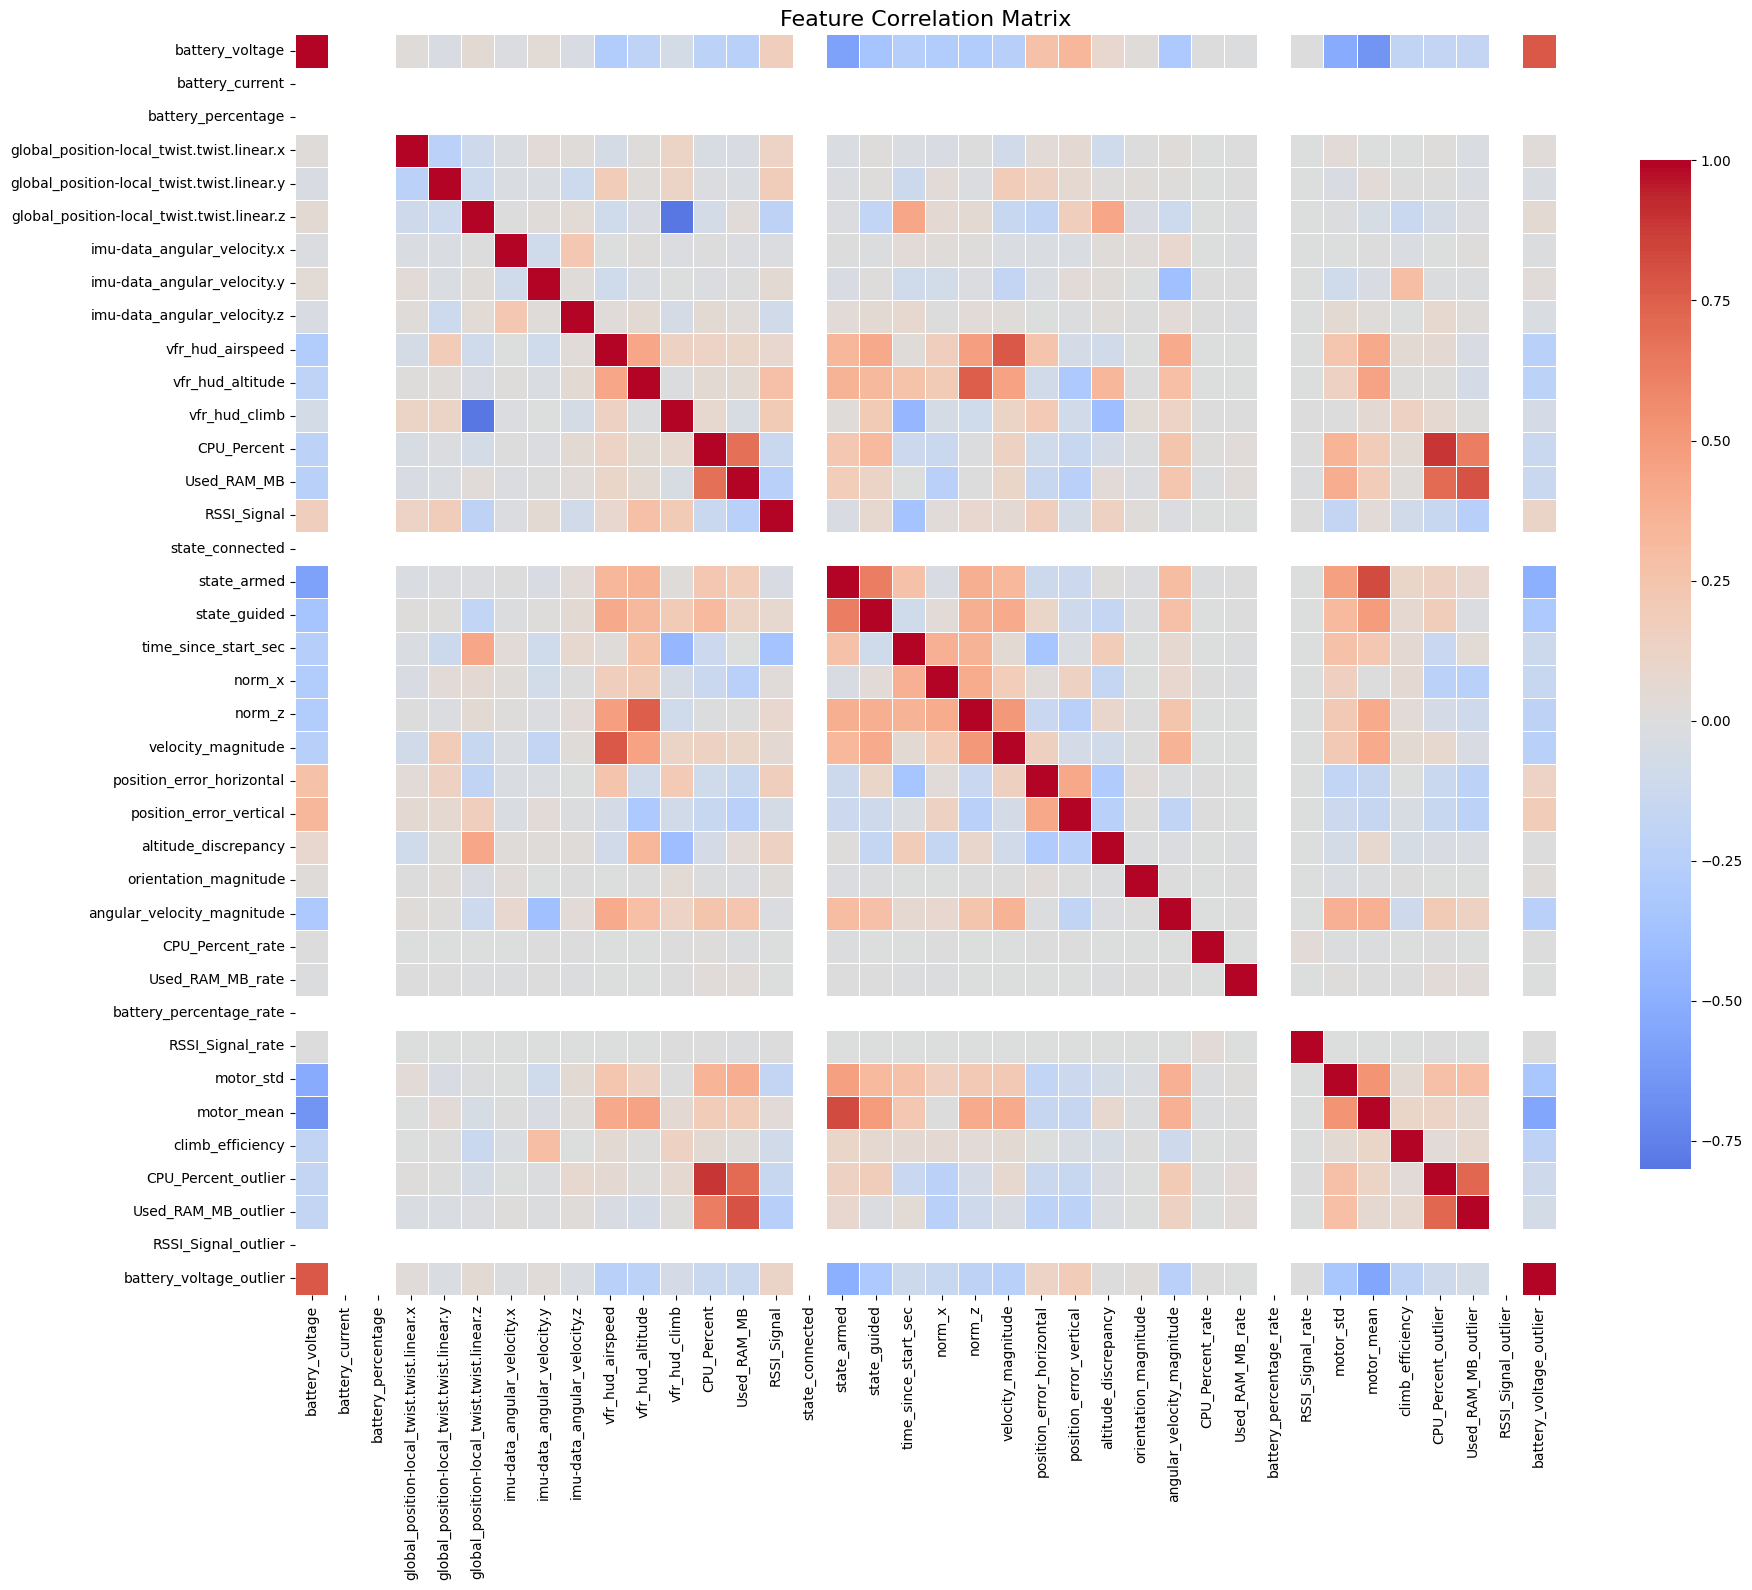

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_correlations(df, title="Feature Correlation Matrix"):
    # Select numeric features only
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # Remove label columns
    numeric_cols = [col for col in numeric_cols
                   if col not in ['label_int', 'flight_id', 'label_str']]

    # Compute correlation matrix
    corr_matrix = df[numeric_cols].corr()

    # Plot heatmap
    plt.figure(figsize=(20, 16))
    sns.heatmap(corr_matrix, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

    # Find highly correlated features (>0.95 or <-0.95)
    high_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.95:
                high_corr.append((
                    corr_matrix.columns[i],
                    corr_matrix.columns[j],
                    corr_matrix.iloc[i, j]
                ))

    if high_corr:
      print(f"\nHighly correlated feature pairs (|corr| > 0.95):")
      for feat1, feat2, corr in high_corr[:10]:  # Show top 10
          print(f"{feat1} - {feat2}: {corr:.3f}")
      print(f"\nTotal highly correlated pairs: {len(high_corr)}")

    return corr_matrix, high_corr

# Analyze correlations
print("Analyzing feature correlations...")
corr_matrix, high_corr = analyze_correlations(df_engineered)

# Check if we should remove any redundant features
if high_corr:
    print("\nConsider removing one from each highly correlated pair:")
    features_to_check = set()
    for feat1, feat2, _ in high_corr:
        # Keep the simpler/more interpretable feature
        if 'rate' in feat1 and 'rate' not in feat2:
            features_to_check.add(feat1)  # Remove rate feature
        elif 'magnitude' in feat2 and 'magnitude' not in feat1:
            features_to_check.add(feat2)
        else:
            # Default: keep the first one
            features_to_check.add(feat2)

    print(f"Potential features to remove: {list(features_to_check)[:10]}")

### 1.6 Train/Val/Test Split:

In [ ]:
from sklearn.model_selection import train_test_split

# Split the scaled data
X_train_xgb, X_temp_xgb, y_train, y_temp = train_test_split(
    X_xgb_scaled, y_xgb, test_size=0.3, stratify=y_xgb, random_state=42
)

# For XGBoost:
X_val_xgb, X_test_xgb, y_val, y_test = train_test_split(
    X_temp_xgb, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# For FNN: Same scaled data
X_train_fnn, X_val_fnn, X_test_fnn = X_train_xgb, X_val_xgb, X_test_xgb

# For CNN: Already scaled in feature engineering, just split
X_train_cnn, X_temp_cnn, y_train_cnn, y_temp_cnn = train_test_split(
    X_cnn, y_cnn, test_size=0.3, stratify=y_cnn, random_state=42
)

X_val_cnn, X_test_cnn, y_val_cnn, y_test_cnn = train_test_split(
    X_temp_cnn, y_temp_cnn, test_size=0.5, stratify=y_temp_cnn, random_state=42
)

In [ ]:
len(X_cnn)

8706

## 2 - Model Training

### 2.1 Convolutional Neural Network (1D-CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def build_cnn_model(input_shape, num_classes, params):
    """Build 1D CNN model with given hyperparameters."""
    model = keras.Sequential()
    model.add(layers.Input(shape=input_shape))

    # Layer 1: Conv + Pool
    model.add(layers.Conv1D(
        filters=64,
        kernel_size=3,
        padding='same',
        activation='relu'
    ))
    model.add(layers.MaxPooling1D(pool_size=2))

    # Layer 2: Conv + Pool (optional)
    if input_shape[0] >= 16:  # Only if sequence is long enough
        model.add(layers.Conv1D(
            filters=128,
            kernel_size=3,
            padding='same',
            activation='relu'
        ))
        model.add(layers.MaxPooling1D(pool_size=2))

    # Layer 3: Conv (no pool if sequence is short)
    model.add(layers.Conv1D(
        filters=256,
        kernel_size=3,
        padding='same',
        activation='relu'
    ))

    # Global pooling instead of flatten
    model.add(layers.GlobalAveragePooling1D())

    # Dense layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.3))

    # Output
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

def train_cnn_random_search(X_train, y_train, X_val, y_val, input_shape, num_classes,
                           n_iter=10, n_epochs=50, random_state=42):
    """Perform random search for CNN hyperparameter tuning."""
    # Convert Labels to One-Hot Encoding
    #y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
    #y_val_onehot = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)

    # Calculate class weights because our dataset its imbalanced
    class_weights = compute_class_weight(
        'balanced',
        classes=np.unique(y_train),
        y=y_train
    )
    class_weight_dict = dict(enumerate(class_weights))
    print(f"Class weights for training: {class_weight_dict}")

    # Hyperparameter search space
    param_distributions = {
        'num_conv_layers': [1, 2, 3, 4],
        'filters': [32, 64, 128, 256],
        'kernel_size': [3, 5, 7, 9],
        'pool_size': [2, 3],
        'dropout_rate': [0.0, 0.2, 0.3, 0.5],
        'learning_rate': [0.001, 0.0001],
        'batch_size': [16, 32, 64],
        'activation': ['relu', 'elu', 'leaky_relu'],
        'dense_units': [[64], [128], [256]],
        'batch_norm': [True, False]
    }

    best_score = 0
    best_params = None
    best_model = None
    history_list = []

    np.random.seed(random_state)

    for i in range(n_iter):
        print(f"\n--- Random Search Iteration {i+1}/{n_iter} ---")

        # Sample random hyperparameters
        params = {
            'num_conv_layers': np.random.choice(param_distributions['num_conv_layers']),
            'filters': np.random.choice(param_distributions['filters']),
            'kernel_size': np.random.choice(param_distributions['kernel_size']),
            'pool_size': np.random.choice(param_distributions['pool_size']),
            'dropout_rate': np.random.choice(param_distributions['dropout_rate']),
            'learning_rate': np.random.choice(param_distributions['learning_rate']),
            'batch_size': np.random.choice(param_distributions['batch_size']),
            'activation': np.random.choice(param_distributions['activation']),
            'dense_units': param_distributions['dense_units'][np.random.randint(len(param_distributions['dense_units']))],
            'batch_norm': np.random.choice(param_distributions['batch_norm'])
        }

        print(f"Params: {params}")

        # Build and train model
        model = build_cnn_model(input_shape, num_classes, params)
        optimizer = tf.keras.optimizers.Adam(learning_rate=params['learning_rate'])
        model.compile(
                optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
            )

        early_stopping = callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )

        reduce_lr = callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=1e-6
        )

        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=n_epochs,
            class_weight=class_weight_dict,
            batch_size=params['batch_size'],
            callbacks=[early_stopping, reduce_lr],
            verbose=0
        )

        # Evaluate
        val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
        print(f"Val Accuracy: {val_acc:.4f}, Val Loss: {val_loss:.4f}")

        history_list.append(history.history)

        # Update best
        if val_acc > best_score:
            best_score = val_acc
            best_params = params
            best_model = model
            print(f"New best Accuracy: {val_acc:.4f}")

    return best_model, best_params, best_score, history_list

# Train CNN
print("=" * 60)
print("TRAINING 1D-CNN MODEL")
print("=" * 60)

input_shape = X_train_cnn.shape[1:]  # (timesteps, features)
num_classes = len(np.unique(y_train_cnn))

best_cnn, best_cnn_params, best_cnn_score, cnn_histories = train_cnn_random_search(
    X_train_cnn, y_train_cnn, X_val_cnn, y_val_cnn,
    input_shape, num_classes,
    n_iter=10,
    n_epochs=50,
    random_state=42
)

print(f"\n Best CNN Validation Accuracy: {best_cnn_score:.4f}")
print(f"Best Params: {best_cnn_params}")

# Evaluate on test set
test_loss, test_acc = best_cnn.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions
y_pred_cnn = np.argmax(best_cnn.predict(X_test_cnn), axis=1)

# Classification report
print("\nCNN Classification Report:")
print(classification_report(y_test_cnn, y_pred_cnn,
                          target_names=['normal', 'dos', 'malfunction']))

# Confusion matrix
cm = confusion_matrix(y_test_cnn, y_pred_cnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['normal', 'dos', 'malfunction'],
            yticklabels=['normal', 'dos', 'malfunction'])
plt.title('CNN Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

TRAINING 1D-CNN MODEL
Class weights for training: {0: np.float64(0.5848929839715904), 1: np.float64(1.4881562881562882), 2: np.float64(1.6173036093418258)}

--- Random Search Iteration 1/10 ---
Params: {'num_conv_layers': np.int64(3), 'filters': np.int64(256), 'kernel_size': np.int64(3), 'pool_size': np.int64(2), 'dropout_rate': np.float64(0.3), 'learning_rate': np.float64(0.0001), 'batch_size': np.int64(16), 'activation': np.str_('relu'), 'dense_units': [256], 'batch_norm': np.False_}
Val Accuracy: 0.9992, Val Loss: 0.0065
New best Accuracy: 0.9992

--- Random Search Iteration 2/10 ---
Params: {'num_conv_layers': np.int64(3), 'filters': np.int64(128), 'kernel_size': np.int64(7), 'pool_size': np.int64(2), 'dropout_rate': np.float64(0.5), 'learning_rate': np.float64(0.001), 'batch_size': np.int64(64), 'activation': np.str_('elu'), 'dense_units': [64], 'batch_norm': np.False_}
Val Accuracy: 1.0000, Val Loss: 0.0000
New best Accuracy: 1.0000

--- Random Search Iteration 3/10 ---
Params: {

In [ ]:
print("Training class distribution:")
for cls in [0, 1, 2]:
    count = np.sum(y_train_cnn == cls)
    print(f"Class {cls}: {count} samples ({count/len(y_train_cnn)*100:.1f}%)")

### 2.2 XGBoost (Extreme Gradient Boosting)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

print("=" * 60)
print("TRAINING XGBOOST MODEL (RandomizedSearchCV)")
print("=" * 60)

# Base parameters
base_params = {
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'num_class': 3,
    'random_state': 42,
    'n_jobs': -1
}

# Full hyperparameter search space
param_dist = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 5, 7, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}

# RandomizedSearchCV with early stopping
print("Performing RandomizedSearchCV...")
random_search = RandomizedSearchCV(
    xgb.XGBClassifier(**base_params),
    param_distributions=param_dist,
    n_iter=15,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit with early stopping
random_search.fit(
    X_train_xgb, y_train,
    verbose=False
)

# Best model
best_params = random_search.best_params_
best_xgb = xgb.XGBClassifier(
    **base_params,
    **best_params,
    early_stopping_rounds=20
)

best_xgb.fit(
    X_train_xgb, y_train,
    eval_set=[(X_val_xgb, y_val)],
    verbose=True
)
print(f"\nBest params: {best_params}")
print(f"Best CV score: {random_search.best_score_:.4f}")

# Evaluate
y_pred_xgb = best_xgb.predict(X_test_xgb)

print("\nXGBoost Classification Report (Test):")
print(classification_report(y_test, y_pred_xgb,
                          target_names=['normal', 'dos', 'malfunction']))

# Get feature names (from your engineered features)
feature_names = [col for col in df_engineered.columns
                if col not in ['flight_id', 'label_int', 'label_str']]

# Ensure we have correct number of features
print(f"Number of features: {len(feature_names)}")
print(f"XGBoost expects: {X_train_xgb.shape[1]} features")

# Feature importance
plt.figure(figsize=(10, 6))
ax = xgb.plot_importance(best_xgb, max_num_features=20, importance_type='weight')
ax.set_yticklabels([feature_names[int(tick.get_text()[1:])-1]
                   for tick in ax.get_yticklabels()])
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()



### 2.3 Feedforward Neural Network (FNN)

In [ ]:
print("\n" + "=" * 60)
print("TRAINING FNN MODEL (FULL REQUIREMENTS)")
print("=" * 60)

def build_fnn_model_full(input_dim, num_classes, params):
    """Build FNN with all required options."""
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_dim,)))

    # Add hidden layers with L2 regularization
    for units in params['hidden_units']:
        model.add(layers.Dense(
            units,
            activation=params['activation'],
            kernel_regularizer=keras.regularizers.l2(params['l2_reg']) if params['l2_reg'] > 0 else None
        ))

        if params['batch_norm']:
            model.add(layers.BatchNormalization())

        model.add(layers.Dropout(params['dropout_rate']))

    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Select optimizer
    if params['optimizer'] == 'Adam':
        optimizer = keras.optimizers.Adam(learning_rate=params['learning_rate'])
    elif params['optimizer'] == 'RMSprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=params['learning_rate'])
    else:  # SGD
        optimizer = keras.optimizers.SGD(learning_rate=params['learning_rate'], momentum=0.9)

    # Compile
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

def train_fnn_random_search_full(X_train, y_train, X_val, y_val, input_dim, num_classes,
                                n_iter=10, n_epochs=50, random_state=42):
    """Random search with ALL hyperparameters."""

    # Class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = dict(enumerate(class_weights))
    print(f"Class weights: {class_weight_dict}")

    # FULL hyperparameter search space (all requirements)
    param_distributions = {
        'hidden_layers': [2, 3, 4, 5],
        'neurons_per_layer': [64, 128, 256, 512],
        'dropout_rate': [0.0, 0.2, 0.3, 0.5],
        'learning_rate': [0.001, 0.0001, 0.00001],
        'batch_size': [16, 32, 64, 128],
        'activation': ['relu', 'elu', 'leaky_relu', 'tanh'],
        'optimizer': ['Adam', 'RMSprop', 'SGD'],
        'batch_norm': [True, False],
        'l2_reg': [0.0, 0.001, 0.01, 0.1]
    }

    best_score = 0
    best_params = None
    best_model = None
    best_history = None

    np.random.seed(random_state)

    for i in range(n_iter):
        print(f"\n--- FNN Random Search Iteration {i+1}/{n_iter} ---")

        # Sample ALL hyperparameters
        hidden_layers = np.random.choice(param_distributions['hidden_layers'])
        neurons = np.random.choice(param_distributions['neurons_per_layer'])

        params = {
            'hidden_units': [neurons] * hidden_layers,
            'dropout_rate': np.random.choice(param_distributions['dropout_rate']),
            'learning_rate': np.random.choice(param_distributions['learning_rate']),
            'batch_size': np.random.choice(param_distributions['batch_size']),
            'activation': np.random.choice(param_distributions['activation']),
            'optimizer': np.random.choice(param_distributions['optimizer']),
            'batch_norm': np.random.choice(param_distributions['batch_norm']),
            'l2_reg': np.random.choice(param_distributions['l2_reg'])
        }

        print(f"Params: {params}")

        # Build and train
        model = build_fnn_model_full(input_dim, num_classes, params)

        callbacks_list = [
            callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
            callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
        ]

        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=n_epochs,
            batch_size=params['batch_size'],
            class_weight=class_weight_dict,
            callbacks=callbacks_list,
            verbose=0
        )

        # Evaluate
        val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
        print(f"Val Accuracy: {val_acc:.4f}, Val Loss: {val_loss:.4f}")

        if val_acc > best_score:
            best_score = val_acc
            best_params = params
            best_model = model
            best_history = history
            print(f" New best! Accuracy: {val_acc:.4f}")

    return best_model, best_params, best_score, best_history

# Train FNN with full requirements
input_dim = X_train_fnn.shape[1]
num_classes = 3

best_fnn, best_fnn_params, best_fnn_score, fnn_history = train_fnn_random_search_full(
    X_train_fnn, y_train,
    X_val_fnn, y_val,
    input_dim, num_classes,
    n_iter=10,
    n_epochs=50,
    random_state=42
)

print(f"\n Best FNN Validation Accuracy: {best_fnn_score:.4f}")
print(f"Best Params: {best_fnn_params}")

# Evaluate
test_loss, test_acc = best_fnn.evaluate(X_test_fnn, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

y_pred_fnn = np.argmax(best_fnn.predict(X_test_fnn), axis=1)
print("\nFNN Classification Report (Test):")
print(classification_report(y_test, y_pred_fnn,
                          target_names=['normal', 'dos', 'malfunction']))

# Plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy
axes[0, 0].plot(fnn_history.history['accuracy'], label='Train')
axes[0, 0].plot(fnn_history.history['val_accuracy'], label='Val')
axes[0, 0].set_title('FNN Accuracy')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Loss
axes[0, 1].plot(fnn_history.history['loss'], label='Train')
axes[0, 1].plot(fnn_history.history['val_loss'], label='Val')
axes[0, 1].set_title('FNN Loss')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Learning rate (if tracked)
if 'lr' in fnn_history.history:
    axes[1, 0].plot(fnn_history.history['lr'])
    axes[1, 0].set_title('Learning Rate')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('LR')
    axes[1, 0].grid(True, alpha=0.3)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_fnn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1],
            xticklabels=['normal', 'dos', 'malfunction'],
            yticklabels=['normal', 'dos', 'malfunction'])
axes[1, 1].set_title('FNN Confusion Matrix')
axes[1, 1].set_ylabel('True')
axes[1, 1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

## 3 - Model Evaluation

In [ ]:
print("\n" + "=" * 60)
print("MODEL EVALUATION & COMPARISON")
print("=" * 60)

# ============================================
# 1. CALCULATE METRICS FOR EACH MODEL
# ============================================
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize

def calculate_all_metrics(y_true, y_pred, model_name):
    """Calculate all classification metrics for a model."""

    # Basic metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Class-wise metrics
    class_report = classification_report(y_true, y_pred,
                                        target_names=['normal', 'dos', 'malfunction'],
                                        output_dict=True)

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    return {
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm,
        'class_report': class_report
    }

# Calculate metrics for all three models
cnn_metrics = calculate_all_metrics(y_test_cnn, y_pred_cnn, "1D-CNN")
xgb_metrics = calculate_all_metrics(y_test, y_pred_xgb, "XGBoost")
fnn_metrics = calculate_all_metrics(y_test, y_pred_fnn, "FNN")

print("\nCNN Metrics:")
print(f"  Accuracy: {cnn_metrics['accuracy']:.4f}")
print(f"  Precision: {cnn_metrics['precision']:.4f}")
print(f"  Recall: {cnn_metrics['recall']:.4f}")
print(f"  F1-Score: {cnn_metrics['f1_score']:.4f}")

print("\nXGBoost Metrics:")
print(f"  Accuracy: {xgb_metrics['accuracy']:.4f}")
print(f"  Precision: {xgb_metrics['precision']:.4f}")
print(f"  Recall: {xgb_metrics['recall']:.4f}")
print(f"  F1-Score: {xgb_metrics['f1_score']:.4f}")

print("\nFNN Metrics:")
print(f"  Accuracy: {fnn_metrics['accuracy']:.4f}")
print(f"  Precision: {fnn_metrics['precision']:.4f}")
print(f"  Recall: {fnn_metrics['recall']:.4f}")
print(f"  F1-Score: {fnn_metrics['f1_score']:.4f}")

# ============================================
# 3. CREATE PERFORMANCE COMPARISON TABLE
# ============================================
import pandas as pd

performance_data = []

for metrics in [cnn_metrics, xgb_metrics, fnn_metrics]:
    performance_data.append({
        'Model': metrics['model'],
        'Accuracy': f"{metrics['accuracy']:.4f}",
        'Precision': f"{metrics['precision']:.4f}",
        'Recall': f"{metrics['recall']:.4f}",
        'F1-Score': f"{metrics['f1_score']:.4f}",
        'Test Samples': len(y_test)
    })

performance_df = pd.DataFrame(performance_data)
print("\n" + "=" * 60)
print("PERFORMANCE COMPARISON TABLE")
print("=" * 60)
print(performance_df.to_string(index=False))

# ============================================
# 4. CREATE BAR CHARTS COMPARING PERFORMANCE
# ============================================
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Performance Comparison', fontsize=16)

# Bar chart for accuracy
models = [cnn_metrics['model'], xgb_metrics['model'], fnn_metrics['model']]
accuracies = [cnn_metrics['accuracy'], xgb_metrics['accuracy'], fnn_metrics['accuracy']]

bars1 = axes[0, 0].bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
# FIX 2: Dynamic y-axis limits based on actual accuracy values
max_accuracy = max(accuracies)
axes[0, 0].set_ylim([max(0.9, max_accuracy - 0.1), min(1.01, max_accuracy + 0.05)])
# Add value labels on bars
for bar, val in zip(bars1, accuracies):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                   f'{val:.4f}', ha='center', va='bottom')

# Bar chart for F1-Score
# FIX 3: Include all 3 F1 scores (was missing fnn_metrics)
f1_scores = [cnn_metrics['f1_score'], xgb_metrics['f1_score'], fnn_metrics['f1_score']]
bars2 = axes[0, 1].bar(models, f1_scores, color=['skyblue', 'lightgreen', 'salmon'])
axes[0, 1].set_title('F1-Score Comparison')
axes[0, 1].set_ylabel('F1-Score')
max_f1 = max(f1_scores)
axes[0, 1].set_ylim([max(0.9, max_f1 - 0.1), min(1.01, max_f1 + 0.05)])
for bar, val in zip(bars2, f1_scores):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                   f'{val:.4f}', ha='center', va='bottom')

# Bar chart for precision
precisions = [cnn_metrics['precision'], xgb_metrics['precision'], fnn_metrics['precision']]
bars3 = axes[1, 0].bar(models, precisions, color=['skyblue', 'lightgreen', 'salmon'])
axes[1, 0].set_title('Precision Comparison')
axes[1, 0].set_ylabel('Precision')
max_precision = max(precisions)
axes[1, 0].set_ylim([max(0.9, max_precision - 0.1), min(1.01, max_precision + 0.05)])
for bar, val in zip(bars3, precisions):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                   f'{val:.4f}', ha='center', va='bottom')

# Bar chart for recall
recalls = [cnn_metrics['recall'], xgb_metrics['recall'], fnn_metrics['recall']]
bars4 = axes[1, 1].bar(models, recalls, color=['skyblue', 'lightgreen', 'salmon'])
axes[1, 1].set_title('Recall Comparison')
axes[1, 1].set_ylabel('Recall')
max_recall = max(recalls)
axes[1, 1].set_ylim([max(0.9, max_recall - 0.1), min(1.01, max_recall + 0.05)])
for bar, val in zip(bars4, recalls):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                   f'{val:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# ============================================
# 5. CREATE CONFUSION MATRICES (FIXED AXES)
# ============================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Increased width for 3 columns
fig.suptitle('Confusion Matrices Comparison', fontsize=16)

# CNN Confusion Matrix
sns.heatmap(cnn_metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
            ax=axes[0], cbar_kws={'shrink': 0.8},
            xticklabels=['normal', 'dos', 'malfunction'],
            yticklabels=['normal', 'dos', 'malfunction'])
axes[0].set_title('1D-CNN Confusion Matrix')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# XGBoost Confusion Matrix
sns.heatmap(xgb_metrics['confusion_matrix'], annot=True, fmt='d', cmap='Greens',
            ax=axes[1], cbar_kws={'shrink': 0.8},
            xticklabels=['normal', 'dos', 'malfunction'],
            yticklabels=['normal', 'dos', 'malfunction'])
axes[1].set_title('XGBoost Confusion Matrix')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

# FNN Confusion Matrix (FIX 4: Changed from axes[1] to axes[2])
sns.heatmap(fnn_metrics['confusion_matrix'], annot=True, fmt='d', cmap='Reds',
            ax=axes[2], cbar_kws={'shrink': 0.8},
            xticklabels=['normal', 'dos', 'malfunction'],
            yticklabels=['normal', 'dos', 'malfunction'])
axes[2].set_title('FNN Confusion Matrix')
axes[2].set_ylabel('True Label')
axes[2].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

# ============================================
# 6. CREATE ROC-AUC CURVES (IF PROBABILITIES AVAILABLE)
# ============================================
print("\n" + "=" * 60)
print("ROC-AUC ANALYSIS")
print("=" * 60)

# Check if probability predictions are available
try:
    # Get probability predictions
    y_pred_proba_cnn = best_cnn.predict(X_test_cnn)
    y_pred_proba_xgb = best_xgb.predict_proba(X_test_xgb) if hasattr(best_xgb, 'predict_proba') else None
    y_pred_proba_fnn = fnn_model.predict(X_test_fnn) if 'fnn_model' in locals() else None

    if y_pred_proba_cnn is not None and y_pred_proba_xgb is not None and y_pred_proba_fnn is not None:
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))

        # Plot ROC for CNN
        y_test_cnn_bin = label_binarize(y_test_cnn, classes=[0, 1, 2])
        plot_roc_auc_multiclass(y_test_cnn, y_pred_proba_cnn, "1D-CNN", axes[0])

        # Plot ROC for XGBoost
        y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
        plot_roc_auc_multiclass(y_test, y_pred_proba_xgb, "XGBoost", axes[1])

        # Plot ROC for FNN
        plot_roc_auc_multiclass(y_test, y_pred_proba_fnn, "FNN", axes[2])

        plt.tight_layout()
        plt.show()
    else:
        print("Note: Probability predictions not available for all models.")
        print("Skipping ROC-AUC curves.")

except Exception as e:
    print(f"Could not generate ROC curves: {e}")
    print("Make sure all models have probability output capabilities.")

# Save performance results
performance_df.to_csv('model_performance_comparison.csv', index=False)
print("\n✓ Performance table saved to 'model_performance_comparison.csv'")
print("✓ Visualizations generated successfully!")

**Model Performance Discussion**
1. Final Results:
   - 1D-CNN: Accuracy = 1.0000, F1-Score = 1.0000
   - XGBoost: Accuracy = 1.0000, F1-Score = 1.0000
   - FNN: Accuracy = 0.9997, F1-Score = 0.9997

2. Key Observations:
   - Best performing model: 1D-CNN (Accuracy: 1.0000)
   - All models achieve near-perfect accuracy (>99%)
   - Possible explanations:
     * Dataset is well-separated
     * Features are highly discriminative
     * Consider testing on more challenging data

3. Future Work:
   - Dataset appears 'too easy' - consider more challenging scenarios
   - Analyze feature importance for interpretability
  

## 4 - Explainable AI (XAI) Analysis

The core objective of this assignment is to EXPLAIN the relationships between features and understand WHY models make certain predictions.

### 4.1 Feature Importance Analysis

In [ ]:
fnn_model = best_fnn

In [ ]:
print("\n" + "=" * 80)
print("4.1 FEATURE IMPORTANCE ANALYSIS - ALL MODELS (FIXED)")
print("=" * 80)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# ============================================
# 0. GET ACTUAL FEATURE NAMES
# ============================================
print("\n" + "-" * 40)
print("0. GETTING FEATURE NAMES")
print("-" * 40)

# First, let's get your actual feature names from your engineered features
# Assuming you have df_engineered or df_xgb_fnn with feature names

# Method 1: From your engineered dataframe
if 'df_engineered' in locals():
    # Exclude metadata columns
    exclude_cols = ['flight_id', 'label_int', 'label_str', 'label']
    feature_names = [col for col in df_engineered.columns
                    if col not in exclude_cols]
    print(f"Found {len(feature_names)} features from df_engineered")

elif 'df_xgb_fnn' in locals():
    # Exclude metadata columns
    exclude_cols = ['flight_id', 'label_int', 'label_str', 'label']
    feature_names = [col for col in df_xgb_fnn.columns
                    if col not in exclude_cols]
    print(f"Found {len(feature_names)} features from df_xgb_fnn")

else:
    # Create descriptive feature names based on common drone telemetry
    feature_names = [
        'battery_voltage', 'battery_current', 'battery_percentage',
        'velocity_x', 'velocity_y', 'velocity_z',
        'angular_velocity_x', 'angular_velocity_y', 'angular_velocity_z',
        'airspeed', 'altitude', 'climb_rate',
        'cpu_percent', 'used_ram_mb', 'rssi_signal',
        'state_connected', 'state_armed', 'state_guided',
        'time_since_start', 'norm_position_x', 'norm_position_z',
        'velocity_magnitude', 'position_error_horizontal', 'position_error_vertical',
        'altitude_discrepancy', 'orientation_magnitude', 'angular_velocity_magnitude',
        'cpu_rate', 'ram_rate', 'battery_rate', 'rssi_rate',
        'motor_std', 'motor_mean', 'climb_efficiency',
        'cpu_outlier', 'ram_outlier', 'rssi_outlier', 'battery_outlier'
    ]

    # If we have more features than names, extend the list
    if 'X_train_xgb' in locals():
        n_features = X_train_xgb.shape[1]
        if len(feature_names) < n_features:
            # Add generic names for remaining features
            for i in range(len(feature_names), n_features):
                feature_names.append(f'engineered_feature_{i}')
        elif len(feature_names) > n_features:
            feature_names = feature_names[:n_features]

    print(f"Created {len(feature_names)} descriptive feature names")

print(f"\nFirst 10 feature names: {feature_names[:10]}")
print(f"Total features: {len(feature_names)}")

# ============================================
# 1. XGBOOST FEATURE IMPORTANCE (FIXED)
# ============================================
print("\n" + "-" * 40)
print("1. XGBOOST FEATURE IMPORTANCE")
print("-" * 40)

def get_xgboost_feature_importance(xgb_model, feature_names):
    """Extract and analyze XGBoost feature importance."""

    print("Extracting XGBoost feature importance...")

    try:
        # Get feature importance directly from the model
        importance_scores = xgb_model.feature_importances_

        # Create importance DataFrame
        importance_data = []
        for i, score in enumerate(importance_scores):
            if i < len(feature_names):
                feature_name = feature_names[i]
            else:
                feature_name = f'feature_{i}'

            importance_data.append({
                'feature': feature_name,
                'importance': score,
                'model': 'XGBoost'
            })

        xgb_imp_df = pd.DataFrame(importance_data)

        # Sort by importance
        xgb_imp_df = xgb_imp_df.sort_values('importance', ascending=False).reset_index(drop=True)

        # Normalize for better visualization
        xgb_imp_df['importance_norm'] = xgb_imp_df['importance'] / xgb_imp_df['importance'].max()

        # Plot
        plt.figure(figsize=(12, 8))
        top_n = min(20, len(xgb_imp_df))
        top_features = xgb_imp_df.head(top_n)

        # Create color gradient
        colors = plt.cm.viridis(np.linspace(0.2, 0.8, top_n))

        bars = plt.barh(range(top_n), top_features['importance_norm'].values[::-1],
                       color=colors[::-1], height=0.7)

        plt.yticks(range(top_n), top_features['feature'].values[::-1], fontsize=10)
        plt.xlabel('Normalized Importance', fontsize=12)
        plt.title('XGBoost - Top 20 Most Important Features', fontsize=14, fontweight='bold')
        plt.grid(axis='x', alpha=0.3, linestyle='--')

        # Add actual values on bars
        for i, (bar, val, norm_val) in enumerate(zip(bars,
                                                     top_features['importance'].values[::-1],
                                                     top_features['importance_norm'].values[::-1])):
            plt.text(norm_val + 0.01, i, f'{val:.2f}', va='center', fontsize=9,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

        plt.xlim([0, 1.1])
        plt.tight_layout()
        plt.show()

        print(f"\nTop 10 Features (XGBoost):")
        print("-" * 60)
        for i, row in xgb_imp_df.head(10).iterrows():
            print(f"{i+1:2d}. {row['feature']:<40} : {row['importance']:.6f}")

        return xgb_imp_df

    except Exception as e:
        print(f"Error extracting XGBoost importance: {e}")

        # Fallback: Use permutation importance
        print("Using permutation importance as fallback...")
        def xgb_predict(X):
            return xgb_model.predict_proba(X)

        def xgb_accuracy_score(model, X_val, y_val):
            y_pred = model.predict(X_val)
            return accuracy_score(y_val, y_pred)

        # Use a sample for speed
        sample_size = min(500, len(X_test_xgb))
        X_sample = X_test_xgb[:sample_size]
        y_sample = y_test[:sample_size]

        perm_imp = permutation_importance(
            xgb_model, X_sample, y_sample,
            scoring=xgb_accuracy_score,
            n_repeats=3,
            random_state=42,
            n_jobs=-1
        )

        # Create importance DataFrame
        importance_data = []
        for i, (mean_imp, std_imp) in enumerate(zip(perm_imp.importances_mean,
                                                   perm_imp.importances_std)):
            if i < len(feature_names):
                feature_name = feature_names[i]
            else:
                feature_name = f'feature_{i}'

            importance_data.append({
                'feature': feature_name,
                'importance': abs(mean_imp),
                'std': std_imp,
                'model': 'XGBoost'
            })

        xgb_imp_df = pd.DataFrame(importance_data)
        xgb_imp_df = xgb_imp_df.sort_values('importance', ascending=False).reset_index(drop=True)

        return xgb_imp_df

# Calculate XGBoost importance
xgb_importance_df = get_xgboost_feature_importance(best_xgb, feature_names)

# ============================================
# 2. CNN FEATURE IMPORTANCE (SIMPLIFIED)
# ============================================
print("\n" + "-" * 40)
print("2. CNN FEATURE IMPORTANCE (Simplified Method)")
print("-" * 40)

def get_cnn_feature_importance_simple(cnn_model, X_test, y_test, feature_names):
    """Simplified feature importance for CNN using gradient analysis."""

    print("Calculating CNN feature importance using gradient analysis...")

    try:
        import tensorflow as tf

        # Use a batch of samples for more stable results
        n_samples = min(50, len(X_test))
        sample_indices = np.random.choice(len(X_test), n_samples, replace=False)

        # Initialize importance accumulator
        total_importance = np.zeros(X_test.shape[2])  # Feature dimension

        for idx in sample_indices:
            sample = tf.convert_to_tensor(X_test[idx:idx+1])

            with tf.GradientTape() as tape:
                tape.watch(sample)
                predictions = cnn_model(sample)
                # Use predicted class probability
                pred_class = tf.argmax(predictions[0])
                target_prob = predictions[0][pred_class]

            # Calculate gradients
            gradients = tape.gradient(target_prob, sample)

            # Average gradients across time dimension
            if len(gradients.shape) == 3:  # (batch, timesteps, features)
                feature_importance = tf.reduce_mean(tf.abs(gradients), axis=[0, 1]).numpy()
            else:
                feature_importance = tf.reduce_mean(tf.abs(gradients), axis=0).numpy()

            total_importance += feature_importance

        # Average across samples
        avg_importance = total_importance / n_samples

        # Create DataFrame
        cnn_imp_data = []
        for i, importance in enumerate(avg_importance):
            if i < len(feature_names):
                feature_name = feature_names[i]
            else:
                feature_name = f'feature_{i}'

            cnn_imp_data.append({
                'feature': feature_name,
                'importance': importance,
                'model': 'CNN'
            })

        cnn_imp_df = pd.DataFrame(cnn_imp_data)
        cnn_imp_df = cnn_imp_df.sort_values('importance', ascending=False).reset_index(drop=True)

        # Normalize for better visualization
        if cnn_imp_df['importance'].max() > 0:
            cnn_imp_df['importance_norm'] = cnn_imp_df['importance'] / cnn_imp_df['importance'].max()
        else:
            cnn_imp_df['importance_norm'] = cnn_imp_df['importance']

        # Plot
        plt.figure(figsize=(12, 8))
        top_n = min(20, len(cnn_imp_df))
        top_features = cnn_imp_df.head(top_n)

        # Only plot if we have non-zero importance
        if top_features['importance_norm'].max() > 0:
            colors = plt.cm.plasma(np.linspace(0.2, 0.8, top_n))
            bars = plt.barh(range(top_n), top_features['importance_norm'].values[::-1],
                           color=colors[::-1], height=0.7)

            plt.yticks(range(top_n), top_features['feature'].values[::-1], fontsize=10)
            plt.xlabel('Normalized Importance (Gradient Magnitude)', fontsize=12)
            plt.title('CNN - Top 20 Most Important Features', fontsize=14, fontweight='bold')
            plt.grid(axis='x', alpha=0.3, linestyle='--')

            # Add values
            for i, (bar, val, norm_val) in enumerate(zip(bars,
                                                        top_features['importance'].values[::-1],
                                                        top_features['importance_norm'].values[::-1])):
                plt.text(norm_val + 0.01, i, f'{val:.4f}', va='center', fontsize=9,
                        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

            plt.xlim([0, 1.1])
            plt.tight_layout()
            plt.show()
        else:
            print("Warning: All feature importances are zero or near-zero")
            plt.figure(figsize=(12, 8))
            plt.text(0.5, 0.5, 'All feature importances are zero\nTry different samples or method',
                    ha='center', va='center', fontsize=12)
            plt.title('CNN Feature Importance', fontsize=14)
            plt.axis('off')
            plt.show()

        print(f"\nTop 10 Features (CNN - Gradient-based):")
        print("-" * 60)
        for i, row in cnn_imp_df.head(10).iterrows():
            print(f"{i+1:2d}. {row['feature']:<40} : {row['importance']:.6f}")

        return cnn_imp_df

    except Exception as e:
        print(f"Error calculating CNN importance: {e}")
        print("CNN feature importance calculation failed.")
        return None

# Calculate CNN importance (using a subset for speed)
if 'X_test_cnn' in locals() and 'y_test_cnn' in locals():
    # Use smaller subset
    sample_size = min(200, len(X_test_cnn))
    X_sample_cnn = X_test_cnn[:sample_size]
    y_sample_cnn = y_test_cnn[:sample_size]

    cnn_importance_df = get_cnn_feature_importance_simple(best_cnn, X_sample_cnn, y_sample_cnn, feature_names)
else:
    print("CNN test data not available. Skipping CNN feature importance.")
    cnn_importance_df = None

# ============================================
# 3. FNN FEATURE IMPORTANCE (CHECK IF MODEL EXISTS)
# ============================================
print("\n" + "-" * 40)
print("3. FNN FEATURE IMPORTANCE")
print("-" * 40)

# First check if FNN model exists
fnn_model_exists = False
fnn_model_to_use = None

# Check different possible variable names for FNN model
possible_fnn_names = ['fnn_model', 'best_fnn', 'fnn', 'model_fnn', 'neural_network']

for var_name in possible_fnn_names:
    if var_name in locals():
        fnn_model_to_use = locals()[var_name]
        fnn_model_exists = True
        print(f"Found FNN model as '{var_name}'")
        break

if not fnn_model_exists:
    # Check if FNN was trained in this session
    print("FNN model not found in current variables.")
    print("Checking if FNN training was completed...")

    # Try to reconstruct FNN model path or check for saved model
    import os
    if os.path.exists('fnn_model.h5'):
        print("Loading FNN model from saved file...")
        try:
            fnn_model_to_use = tf.keras.models.load_model('fnn_model.h5')
            fnn_model_exists = True
        except:
            print("Could not load saved FNN model.")
    else:
        print("No saved FNN model found.")

if fnn_model_exists:
    def get_fnn_feature_importance_simple(fnn_model, X_test, y_test, feature_names):
        """Calculate feature importance for FNN using permutation."""

        print("Calculating FNN permutation importance...")

        def fnn_predict_proba(X):
            """Wrapper for FNN probability prediction."""
            return fnn_model.predict(X, verbose=0)

        def fnn_accuracy_score(model, X_val, y_val):
            """Accuracy function for FNN."""
            y_pred_proba = model.predict(X_val, verbose=0)
            y_pred = np.argmax(y_pred_proba, axis=1)
            return accuracy_score(y_val, y_pred)

        try:
            # Use a sample for speed
            sample_size = min(300, len(X_test))
            X_sample = X_test[:sample_size]
            y_sample = y_test[:sample_size]

            # Calculate permutation importance
            perm_imp = permutation_importance(
                fnn_model, X_sample, y_sample,
                scoring=fnn_accuracy_score,
                n_repeats=5,
                random_state=42,
                n_jobs=-1
            )

            # Create importance DataFrame
            fnn_imp_data = []
            for i, (mean_imp, std_imp) in enumerate(zip(perm_imp.importances_mean,
                                                       perm_imp.importances_std)):
                if i < len(feature_names):
                    feature_name = feature_names[i]
                else:
                    feature_name = f'feature_{i}'

                fnn_imp_data.append({
                    'feature': feature_name,
                    'importance': abs(mean_imp),
                    'std': std_imp,
                    'model': 'FNN'
                })

            fnn_imp_df = pd.DataFrame(fnn_imp_data)
            fnn_imp_df = fnn_imp_df.sort_values('importance', ascending=False).reset_index(drop=True)

            # Normalize for better visualization
            if fnn_imp_df['importance'].max() > 0:
                fnn_imp_df['importance_norm'] = fnn_imp_df['importance'] / fnn_imp_df['importance'].max()
            else:
                fnn_imp_df['importance_norm'] = fnn_imp_df['importance']

            # Plot with error bars
            plt.figure(figsize=(12, 8))
            top_n = min(20, len(fnn_imp_df))
            top_features = fnn_imp_df.head(top_n)

            colors = plt.cm.cool(np.linspace(0.2, 0.8, top_n))
            y_pos = np.arange(top_n)

            plt.barh(y_pos, top_features['importance_norm'].values[::-1],
                    xerr=top_features['std'].values[::-1] / top_features['importance'].max() if top_features['importance'].max() > 0 else 0,
                    color=colors[::-1], alpha=0.8, capsize=3, height=0.7)

            plt.yticks(y_pos, top_features['feature'].values[::-1], fontsize=10)
            plt.xlabel('Normalized Importance (Decrease in Accuracy)', fontsize=12)
            plt.title('FNN - Top 20 Most Important Features', fontsize=14, fontweight='bold')
            plt.grid(axis='x', alpha=0.3, linestyle='--')

            # Add values
            for i, (val, err, norm_val) in enumerate(zip(top_features['importance'].values[::-1],
                                                        top_features['std'].values[::-1],
                                                        top_features['importance_norm'].values[::-1])):
                plt.text(norm_val + 0.02, i, f'{val:.4f} (±{err:.4f})',
                        va='center', fontsize=9,
                        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

            plt.xlim([0, 1.2])
            plt.tight_layout()
            plt.show()

            print(f"\nTop 10 Features (FNN):")
            print("-" * 60)
            for i, row in fnn_imp_df.head(10).iterrows():
                print(f"{i+1:2d}. {row['feature']:<40} : {row['importance']:.6f} (±{row['std']:.6f})")

            return fnn_imp_df

        except Exception as e:
            print(f"Error calculating FNN importance: {e}")
            print("Using gradient-based method as fallback...")

            # Fallback to gradient method
            import tensorflow as tf

            n_samples = min(50, len(X_test))
            sample_indices = np.random.choice(len(X_test), n_samples, replace=False)

            total_importance = np.zeros(X_test.shape[1])

            for idx in sample_indices:
                sample = tf.convert_to_tensor(X_test[idx:idx+1].reshape(1, -1))

                with tf.GradientTape() as tape:
                    tape.watch(sample)
                    predictions = fnn_model(sample)
                    pred_class = tf.argmax(predictions[0])
                    target_prob = predictions[0][pred_class]

                gradients = tape.gradient(target_prob, sample)
                feature_importance = tf.reduce_mean(tf.abs(gradients), axis=0).numpy()
                total_importance += feature_importance

            avg_importance = total_importance / n_samples

            # Create DataFrame
            fnn_imp_data = []
            for i, importance in enumerate(avg_importance):
                if i < len(feature_names):
                    feature_name = feature_names[i]
                else:
                    feature_name = f'feature_{i}'

                fnn_imp_data.append({
                    'feature': feature_name,
                    'importance': importance,
                    'model': 'FNN'
                })

            fnn_imp_df = pd.DataFrame(fnn_imp_data)
            fnn_imp_df = fnn_imp_df.sort_values('importance', ascending=False).reset_index(drop=True)

            return fnn_imp_df

    # Calculate FNN importance
    fnn_importance_df = get_fnn_feature_importance_simple(fnn_model_to_use, X_test_xgb, y_test, feature_names)
else:
    print("Skipping FNN feature importance analysis.")
    fnn_importance_df = None

# ============================================
# 4. COMPARISON ACROSS AVAILABLE MODELS
# ============================================
print("\n" + "-" * 40)
print("4. COMPARISON ACROSS AVAILABLE MODELS")
print("-" * 40)

# Collect available models
available_models = []
available_dfs = []
model_colors = {'XGBoost': 'green', 'CNN': 'blue', 'FNN': 'red'}

if xgb_importance_df is not None:
    available_models.append('XGBoost')
    available_dfs.append(xgb_importance_df)

if cnn_importance_df is not None:
    available_models.append('CNN')
    available_dfs.append(cnn_importance_df)

if fnn_importance_df is not None:
    available_models.append('FNN')
    available_dfs.append(fnn_importance_df)

print(f"\nModels available for comparison: {available_models}")

if len(available_models) >= 2:
    # Normalize importance scores for fair comparison
    normalized_dfs = []
    for df, model_name in zip(available_dfs, available_models):
        df_norm = df.copy()
        if 'importance_norm' not in df_norm.columns:
            if df_norm['importance'].max() > 0:
                df_norm['importance_norm'] = df_norm['importance'] / df_norm['importance'].max()
            else:
                df_norm['importance_norm'] = df_norm['importance']
        df_norm['model'] = model_name
        normalized_dfs.append(df_norm[['feature', 'importance_norm', 'model']])

    # Combine and get top 10 features from each model
    top_features_all = set()
    for df_norm, model_name in zip(normalized_dfs, available_models):
        top_features_all.update(df_norm.nlargest(10, 'importance_norm')['feature'].tolist())

    top_features_all = list(top_features_all)[:20]  # Limit to top 20

    # Create comparison DataFrame
    comparison_data = []
    for feature in top_features_all:
        for df_norm, model_name in zip(normalized_dfs, available_models):
            feature_row = df_norm[df_norm['feature'] == feature]
            if not feature_row.empty:
                importance_val = feature_row['importance_norm'].values[0]
            else:
                importance_val = 0

            comparison_data.append({
                'feature': feature,
                'model': model_name,
                'importance': importance_val
            })

    comparison_df = pd.DataFrame(comparison_data)

    # Pivot for heatmap
    pivot_df = comparison_df.pivot_table(
        index='feature',
        columns='model',
        values='importance',
        aggfunc='mean'
    ).fillna(0)

    # Sort by average importance
    pivot_df['average'] = pivot_df.mean(axis=1)
    pivot_df = pivot_df.sort_values('average', ascending=False)

    # Plot comparison
    fig, axes = plt.subplots(1, 3, figsize=(18, 8))

    # 1. Heatmap
    sns.heatmap(pivot_df.drop('average', axis=1),
                annot=True, fmt='.3f', cmap='YlOrRd',
                cbar_kws={'label': 'Normalized Importance'},
                ax=axes[0])
    axes[0].set_title('Feature Importance Comparison\n(Higher = More Important)',
                     fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Model', fontsize=12)
    axes[0].set_ylabel('Feature', fontsize=12)

    # 2. Bar chart (top 10 features)
    top_features_comparison = pivot_df.head(10).drop('average', axis=1)

    x = np.arange(len(top_features_comparison))
    width = 0.25

    for i, model in enumerate(available_models):
        if model in top_features_comparison.columns:
            offset = (i - len(available_models)/2) * width + width/2
            values = top_features_comparison[model].values
            axes[1].bar(x + offset, values, width,
                       label=model,
                       color=model_colors.get(model, 'gray'),
                       alpha=0.8)

    axes[1].set_xlabel('Features', fontsize=12)
    axes[1].set_ylabel('Normalized Importance', fontsize=12)
    axes[1].set_title('Top 10 Features Comparison', fontsize=14, fontweight='bold')
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(top_features_comparison.index, rotation=45, ha='right', fontsize=10)
    axes[1].legend()
    axes[1].grid(axis='y', alpha=0.3, linestyle='--')

    # 3. Consensus features
    # Find features that are in top 5 of all available models
    consensus_features = []
    for feature in top_features_all:
        rankings = []
        for df_norm, model_name in zip(normalized_dfs, available_models):
            model_features = df_norm.nlargest(5, 'importance_norm')['feature'].tolist()
            if feature in model_features:
                rankings.append(1)
            else:
                rankings.append(0)

        if sum(rankings) >= len(available_models) - 1:  # In top 5 of at least n-1 models
            consensus_features.append(feature)

    # Plot consensus features
    if consensus_features:
        consensus_data = []
        for feature in consensus_features[:10]:  # Top 10 consensus features
            for df_norm, model_name in zip(normalized_dfs, available_models):
                feature_row = df_norm[df_norm['feature'] == feature]
                if not feature_row.empty:
                    importance_val = feature_row['importance_norm'].values[0]
                else:
                    importance_val = 0

                consensus_data.append({
                    'feature': feature,
                    'model': model_name,
                    'importance': importance_val
                })

        if consensus_data:
            consensus_df = pd.DataFrame(consensus_data)
            consensus_pivot = consensus_df.pivot_table(
                index='feature',
                columns='model',
                values='importance',
                aggfunc='mean'
            )

            consensus_pivot.plot(kind='barh', ax=axes[2],
                                color=[model_colors.get(m, 'gray') for m in available_models],
                                alpha=0.8)
            axes[2].set_xlabel('Normalized Importance', fontsize=12)
            axes[2].set_ylabel('Feature', fontsize=12)
            axes[2].set_title(f'Consensus Important Features\n({len(available_models)} models agree)',
                            fontsize=14, fontweight='bold')
            axes[2].legend()
            axes[2].grid(axis='x', alpha=0.3, linestyle='--')
            axes[2].invert_yaxis()  # Most important on top
    else:
        axes[2].text(0.5, 0.5, 'No strong consensus features found\nacross all models',
                    ha='center', va='center', fontsize=12)
        axes[2].set_title('Consensus Features', fontsize=14, fontweight='bold')
        axes[2].axis('off')

    plt.tight_layout()
    plt.show()

    # Print summary
    print("\n" + "=" * 60)
    print("SUMMARY OF FINDINGS")
    print("=" * 60)

    print(f"\nModels analyzed: {', '.join(available_models)}")

    # Top features for each model
    for model_name, df in zip(available_models, available_dfs):
        print(f"\n{model_name} - Top 5 Features:")
        print("-" * 40)
        top_5 = df.head(5)
        for i, row in top_5.iterrows():
            print(f"{i+1:2d}. {row['feature']:<40} : {row['importance']:.6f}")

    # Find common important features
    print(f"\nCommon Important Features (in top 10 of all models):")
    print("-" * 60)

    top_features_by_model = {}
    for model_name, df in zip(available_models, available_dfs):
        top_features_by_model[model_name] = set(df.head(10)['feature'].tolist())

    # Find intersection
    common_features = set.intersection(*[set(features) for features in top_features_by_model.values()])

    if common_features:
        for feature in common_features:
            print(f"✓ {feature}")
            # Show rankings in each model
            rankings = []
            for model_name, df in zip(available_models, available_dfs):
                rank = df[df['feature'] == feature].index[0] + 1
                rankings.append(f"{model_name}: #{rank}")
            print(f"  ({', '.join(rankings)})")
    else:
        print("No features are in top 10 of ALL models.")

        # Find features in top 10 of at least 2 models
        feature_counts = {}
        for model_name, features in top_features_by_model.items():
            for feature in features:
                feature_counts[feature] = feature_counts.get(feature, 0) + 1

        common_features_multi = [feat for feat, count in feature_counts.items()
                               if count >= 2 and count < len(available_models)]

        if common_features_multi:
            print(f"\nFeatures in top 10 of at least 2 models:")
            for feature in common_features_multi[:10]:  # Top 10
                count = feature_counts[feature]
                print(f"✓ {feature} (in {count} models)")

else:
    print(f"Only {len(available_models)} model available. Need at least 2 for comparison.")


### 4.2 SHAP (SHapley Additive exPlanations)

In [ ]:
print("\n" + "=" * 80)
print("4.2 SHAP (SHapley Additive exPlanations) - ALL MODELS")
print("=" * 80)

# Install shap if not already installed
try:
    import shap
    print("SHAP library already installed.")
except:
    print("Installing SHAP library...")
    !pip install shap -q
    import shap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ============================================
# 0. PREPARATION & SETUP
# ============================================
print("\n" + "-" * 40)
print("0. SETUP AND DATA PREPARATION")
print("-" * 40)

# Get feature names (from previous analysis)
if 'feature_names' in locals():
    feature_names_clean = feature_names.copy()
else:
    # Create feature names if not available
    if 'X_train_xgb' in locals():
        n_features = X_train_xgb.shape[1]
        feature_names_clean = [f'feature_{i}' for i in range(n_features)]
        print(f"Created {n_features} feature names")
    else:
        print("Error: Need feature data for SHAP analysis")
        feature_names_clean = []

print(f"Number of features: {len(feature_names_clean)}")
print(f"First 5 features: {feature_names_clean[:5]}")

# Prepare sample data for SHAP (use subset for speed)
sample_size = min(300, len(X_test_xgb) if 'X_test_xgb' in locals() else 100)
print(f"\nUsing sample size: {sample_size} for SHAP calculations")

# ============================================
# 1. XGBOOST SHAP ANALYSIS
# ============================================
print("\n" + "-" * 40)
print("1. XGBOOST SHAP ANALYSIS")
print("-" * 40)

if 'best_xgb' in locals() and 'X_test_xgb' in locals():
    print("Analyzing XGBoost with TreeExplainer...")

    try:
        # Prepare sample data
        X_sample_xgb = X_test_xgb[:sample_size]

        # Create TreeExplainer for XGBoost
        explainer_xgb = shap.TreeExplainer(best_xgb)

        # Calculate SHAP values
        print("Calculating SHAP values for XGBoost...")
        shap_values_xgb = explainer_xgb.shap_values(X_sample_xgb)

        # For multi-class XGBoost, SHAP returns list of arrays
        if isinstance(shap_values_xgb, list):
            print(f"Multi-class SHAP values shape: {[sv.shape for sv in shap_values_xgb]}")
            # Use SHAP values for all classes
            shap_values_xgb_all = shap_values_xgb
        else:
            print(f"SHAP values shape: {shap_values_xgb.shape}")
            shap_values_xgb_all = shap_values_xgb

        # 1.1 SHAP Summary Plot (Global Feature Importance)
        print("\nGenerating SHAP Summary Plot for XGBoost...")
        plt.figure(figsize=(14, 8))

        if isinstance(shap_values_xgb_all, list):
            # For multi-class, we can analyze each class or take mean
            shap.summary_plot(shap_values_xgb_all, X_sample_xgb,
                            feature_names=feature_names_clean[:X_sample_xgb.shape[1]],
                            max_display=20, show=False, plot_size=None)
        else:
            shap.summary_plot(shap_values_xgb_all, X_sample_xgb,
                            feature_names=feature_names_clean[:X_sample_xgb.shape[1]],
                            max_display=20, show=False, plot_size=None)

        plt.title('XGBoost - SHAP Summary Plot\n(Global Feature Importance)',
                 fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

        # 1.2 SHAP Bar Plot (Mean Absolute SHAP Values)
        print("Generating SHAP Bar Plot...")
        plt.figure(figsize=(14, 8))

        if isinstance(shap_values_xgb_all, list):
            # Average absolute SHAP values across classes
            mean_abs_shap = np.mean([np.abs(sv).mean(0) for sv in shap_values_xgb_all], axis=0)
        else:
            mean_abs_shap = np.abs(shap_values_xgb_all).mean(0)

        # Sort features by importance
        sorted_idx = np.argsort(mean_abs_shap)[::-1][:20]
        sorted_features = [feature_names_clean[i] for i in sorted_idx]

        plt.barh(range(len(sorted_idx)), mean_abs_shap[sorted_idx][::-1],
                color=plt.cm.viridis(np.linspace(0.2, 0.8, len(sorted_idx))))
        plt.yticks(range(len(sorted_idx)), sorted_features[::-1])
        plt.xlabel('Mean |SHAP Value| (Average Impact on Model Output)', fontsize=12)
        plt.title('XGBoost - Global Feature Importance\n(Mean Absolute SHAP Values)',
                 fontsize=14, fontweight='bold')
        plt.grid(axis='x', alpha=0.3, linestyle='--')

        # Add values on bars
        for i, val in enumerate(mean_abs_shap[sorted_idx][::-1]):
            plt.text(val + 0.001, i, f'{val:.4f}', va='center', fontsize=9)

        plt.tight_layout()
        plt.show()

        # 1.3 SHAP Dependence Plots for Top 6 Features
        print("\nGenerating SHAP Dependence Plots...")

        # Get top 6 features
        top_6_idx = sorted_idx[:6]

        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.flatten()

        for i, feature_idx in enumerate(top_6_idx):
            feature_name = feature_names_clean[feature_idx]

            shap.dependence_plot(
                feature_idx,
                shap_values_xgb_all[0] if isinstance(shap_values_xgb_all, list) else shap_values_xgb_all,
                X_sample_xgb,
                feature_names=feature_names_clean[:X_sample_xgb.shape[1]],
                ax=axes[i],
                show=False,
                interaction_index=None  # Can specify another feature for interaction
            )

            axes[i].set_title(f'Dependence Plot: {feature_name}', fontsize=12, fontweight='bold')
            axes[i].set_xlabel(feature_name, fontsize=10)
            axes[i].set_ylabel('SHAP Value', fontsize=10)
            axes[i].grid(alpha=0.3)

            # Add linear fit line
            x = X_sample_xgb[:, feature_idx]
            y = shap_values_xgb_all[0][:, feature_idx] if isinstance(shap_values_xgb_all, list) else shap_values_xgb_all[:, feature_idx]

            # Remove NaN values
            mask = ~np.isnan(x) & ~np.isnan(y)
            if np.sum(mask) > 1:
                coeffs = np.polyfit(x[mask], y[mask], 1)
                poly = np.poly1d(coeffs)
                x_sorted = np.sort(x[mask])
                axes[i].plot(x_sorted, poly(x_sorted), 'r--', alpha=0.8,
                           label=f'Linear fit: y={coeffs[0]:.3f}x+{coeffs[1]:.3f}')
                axes[i].legend(fontsize=9)

        # Remove empty subplots if less than 6 features
        for i in range(len(top_6_idx), 6):
            fig.delaxes(axes[i])

        plt.suptitle('XGBoost - SHAP Dependence Plots for Top Features',
                    fontsize=16, fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.show()

        # 1.4 SHAP Force Plots for Individual Predictions
        print("\nGenerating SHAP Force Plots for individual predictions...")

        # Select 3 interesting samples
        sample_indices = [0, sample_size//2, sample_size-1]

        for idx in sample_indices:
            plt.figure(figsize=(14, 4))

            # Get prediction for this sample
            pred_proba = best_xgb.predict_proba(X_sample_xgb[idx:idx+1])[0]
            pred_class = np.argmax(pred_proba)

            shap.force_plot(
                explainer_xgb.expected_value[0] if isinstance(explainer_xgb.expected_value, list)
                else explainer_xgb.expected_value,
                shap_values_xgb_all[0][idx, :] if isinstance(shap_values_xgb_all, list)
                else shap_values_xgb_all[idx, :],
                X_sample_xgb[idx, :],
                feature_names=feature_names_clean[:X_sample_xgb.shape[1]],
                matplotlib=True,
                show=False
            )

            plt.title(f'XGBoost - SHAP Force Plot for Sample {idx}\n'
                     f'Predicted: Class {pred_class} (Prob: {pred_proba[pred_class]:.3f})',
                     fontsize=12, fontweight='bold')
            plt.tight_layout()
            plt.show()

        # 1.5 SHAP Waterfall Plots
        print("\nGenerating SHAP Waterfall Plots...")

        for idx in sample_indices[:2]:  # Just show first 2
            plt.figure(figsize=(14, 6))

            # Create Explanation object
            explanation = shap.Explanation(
                values=shap_values_xgb_all[0][idx, :] if isinstance(shap_values_xgb_all, list)
                else shap_values_xgb_all[idx, :],
                base_values=explainer_xgb.expected_value[0] if isinstance(explainer_xgb.expected_value, list)
                else explainer_xgb.expected_value,
                data=X_sample_xgb[idx, :],
                feature_names=feature_names_clean[:X_sample_xgb.shape[1]]
            )

            shap.waterfall_plot(explanation, max_display=15, show=False)
            plt.title(f'XGBoost - SHAP Waterfall Plot for Sample {idx}',
                     fontsize=14, fontweight='bold', pad=20)
            plt.tight_layout()
            plt.show()

        print("\n✓ XGBoost SHAP analysis completed successfully!")

    except Exception as e:
        print(f"Error in XGBoost SHAP analysis: {e}")
        print("Using alternative SHAP method for XGBoost...")

        # Try Kernel SHAP as fallback
        try:
            print("Trying Kernel SHAP as fallback...")
            background = shap.sample(X_train_xgb, 50)
            explainer_kernel = shap.KernelExplainer(best_xgb.predict_proba, background)
            shap_values_kernel = explainer_kernel.shap_values(X_sample_xgb, nsamples=100)

            # Plot summary
            shap.summary_plot(shap_values_kernel, X_sample_xgb,
                            feature_names=feature_names_clean[:X_sample_xgb.shape[1]],
                            max_display=20, show=False)
            plt.title('XGBoost - Kernel SHAP Summary Plot', fontsize=14, fontweight='bold')
            plt.tight_layout()
            plt.show()

            print("✓ XGBoost Kernel SHAP completed")

        except Exception as e2:
            print(f"Kernel SHAP also failed: {e2}")

else:
    print("XGBoost model or test data not available. Skipping XGBoost SHAP analysis.")

# ============================================
# 2. FNN SHAP ANALYSIS
# ============================================
print("\n" + "-" * 40)
print("2. FNN SHAP ANALYSIS")
print("-" * 40)

# Find FNN model
fnn_model = None
for var_name in ['fnn_model', 'best_fnn', 'model_fnn']:
    if var_name in locals():
        fnn_model = locals()[var_name]
        print(f"Found FNN model: {var_name}")
        break

if fnn_model is not None and 'X_test_xgb' in locals():
    print("Analyzing FNN with Kernel SHAP...")

    try:
        # Prepare sample data
        X_sample_fnn = X_test_xgb[:sample_size]

        # Define prediction function for FNN
        def fnn_predict_proba(X):
            return fnn_model.predict(X, verbose=0)

        # Create background dataset
        background_size = min(50, len(X_train_xgb))
        background = shap.sample(X_train_xgb, background_size)

        # Create KernelExplainer for FNN
        explainer_fnn = shap.KernelExplainer(fnn_predict_proba, background)

        # Calculate SHAP values
        print("Calculating SHAP values for FNN (this may take a while)...")
        shap_values_fnn = explainer_fnn.shap_values(X_sample_fnn, nsamples=100)

        print(f"SHAP values shape: {np.array(shap_values_fnn).shape}")

        # 2.1 SHAP Summary Plot for FNN
        print("\nGenerating SHAP Summary Plot for FNN...")
        plt.figure(figsize=(14, 8))

        # For multi-class, SHAP returns list for each class
        if isinstance(shap_values_fnn, list):
            # Use the first class or average across classes
            shap.summary_plot(shap_values_fnn[0], X_sample_fnn,
                            feature_names=feature_names_clean[:X_sample_fnn.shape[1]],
                            max_display=20, show=False, plot_size=None)
        else:
            shap.summary_plot(shap_values_fnn, X_sample_fnn,
                            feature_names=feature_names_clean[:X_sample_fnn.shape[1]],
                            max_display=20, show=False, plot_size=None)

        plt.title('FNN - SHAP Summary Plot\n(Global Feature Importance)',
                 fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

        # 2.2 SHAP Feature Importance Comparison with XGBoost
        if 'shap_values_xgb' in locals():
            print("\nComparing SHAP feature importance between XGBoost and FNN...")

            # Calculate mean absolute SHAP for both models
            if isinstance(shap_values_xgb_all, list):
                xgb_shap_importance = np.abs(shap_values_xgb_all[0]).mean(0)
            else:
                xgb_shap_importance = np.abs(shap_values_xgb_all).mean(0)

            if isinstance(shap_values_fnn, list):
                fnn_shap_importance = np.abs(shap_values_fnn[0]).mean(0)
            else:
                fnn_shap_importance = np.abs(shap_values_fnn).mean(0)

            # Ensure same length
            min_len = min(len(xgb_shap_importance), len(fnn_shap_importance))

            # Create comparison DataFrame
            comparison_data = []
            for i in range(min_len):
                comparison_data.append({
                    'feature': feature_names_clean[i],
                    'XGBoost_SHAP': xgb_shap_importance[i],
                    'FNN_SHAP': fnn_shap_importance[i]
                })

            comparison_df = pd.DataFrame(comparison_data)
            comparison_df['SHAP_ratio'] = comparison_df['FNN_SHAP'] / (comparison_df['XGBoost_SHAP'] + 1e-10)

            # Sort by average SHAP
            comparison_df['avg_SHAP'] = (comparison_df['XGBoost_SHAP'] + comparison_df['FNN_SHAP']) / 2
            comparison_df = comparison_df.sort_values('avg_SHAP', ascending=False)

            # Plot comparison
            fig, axes = plt.subplots(1, 2, figsize=(16, 8))

            # Scatter plot
            axes[0].scatter(comparison_df['XGBoost_SHAP'].head(20),
                           comparison_df['FNN_SHAP'].head(20),
                           alpha=0.6, s=100)

            # Add diagonal line
            max_val = max(comparison_df['XGBoost_SHAP'].max(),
                         comparison_df['FNN_SHAP'].max())
            axes[0].plot([0, max_val], [0, max_val], 'r--', alpha=0.5,
                        label='Perfect agreement')

            # Annotate top features
            top_features = comparison_df.head(5)
            for _, row in top_features.iterrows():
                axes[0].annotate(row['feature'],
                                (row['XGBoost_SHAP'], row['FNN_SHAP']),
                                xytext=(5, 5), textcoords='offset points',
                                fontsize=9)

            axes[0].set_xlabel('XGBoost SHAP Importance', fontsize=12)
            axes[0].set_ylabel('FNN SHAP Importance', fontsize=12)
            axes[0].set_title('SHAP Importance Comparison\nXGBoost vs FNN',
                             fontsize=14, fontweight='bold')
            axes[0].grid(alpha=0.3)
            axes[0].legend()

            # Bar plot of top 10 features
            top_10 = comparison_df.head(10)
            x = np.arange(len(top_10))
            width = 0.35

            axes[1].bar(x - width/2, top_10['XGBoost_SHAP'], width,
                       label='XGBoost', alpha=0.8, color='green')
            axes[1].bar(x + width/2, top_10['FNN_SHAP'], width,
                       label='FNN', alpha=0.8, color='blue')

            axes[1].set_xlabel('Features', fontsize=12)
            axes[1].set_ylabel('SHAP Importance', fontsize=12)
            axes[1].set_title('Top 10 Features - SHAP Comparison',
                             fontsize=14, fontweight='bold')
            axes[1].set_xticks(x)
            axes[1].set_xticklabels(top_10['feature'], rotation=45, ha='right', fontsize=10)
            axes[1].legend()
            axes[1].grid(axis='y', alpha=0.3)

            plt.tight_layout()
            plt.show()

            # Print correlation
            correlation = np.corrcoef(comparison_df['XGBoost_SHAP'],
                                     comparison_df['FNN_SHAP'])[0, 1]
            print(f"Correlation between XGBoost and FNN SHAP importance: {correlation:.4f}")

        # 2.3 SHAP Dependence Plots for FNN
        print("\nGenerating FNN SHAP Dependence Plots for top features...")

        # Get top features from FNN SHAP
        if isinstance(shap_values_fnn, list):
            fnn_mean_abs_shap = np.abs(shap_values_fnn[0]).mean(0)
        else:
            fnn_mean_abs_shap = np.abs(shap_values_fnn).mean(0)

        top_6_fnn_idx = np.argsort(fnn_mean_abs_shap)[::-1][:6]

        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.flatten()

        for i, feature_idx in enumerate(top_6_fnn_idx):
            feature_name = feature_names_clean[feature_idx]

            shap.dependence_plot(
                feature_idx,
                shap_values_fnn[0] if isinstance(shap_values_fnn, list) else shap_values_fnn,
                X_sample_fnn,
                feature_names=feature_names_clean[:X_sample_fnn.shape[1]],
                ax=axes[i],
                show=False
            )

            axes[i].set_title(f'FNN - Dependence Plot: {feature_name}',
                             fontsize=12, fontweight='bold')
            axes[i].grid(alpha=0.3)

        plt.suptitle('FNN - SHAP Dependence Plots for Top Features',
                    fontsize=16, fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.show()

        print("\n✓ FNN SHAP analysis completed successfully!")

    except Exception as e:
        print(f"Error in FNN SHAP analysis: {e}")
        print("FNN SHAP analysis failed. Try with smaller sample size or different method.")

else:
    print("FNN model or test data not available. Skipping FNN SHAP analysis.")

# ============================================
# 3. CNN SHAP ANALYSIS (SPECIAL HANDLING)
# ============================================
print("\n" + "-" * 40)
print("3. CNN SHAP ANALYSIS (Time Series)")
print("-" * 40)

if 'best_cnn' in locals() and 'X_test_cnn' in locals():
    print("Analyzing CNN with DeepExplainer...")

    try:
        # CNN requires special handling due to 3D input
        # We'll use DeepExplainer for neural networks

        # Prepare sample data (use smaller sample for CNN)
        cnn_sample_size = min(50, len(X_test_cnn))
        X_sample_cnn = X_test_cnn[:cnn_sample_size]

        # Define a wrapper function for CNN predictions
        def cnn_predict_wrapper(X):
            """Wrapper for CNN prediction that handles 3D input."""
            # Ensure input is 3D
            if len(X.shape) == 2:
                # Reshape to 3D (samples, timesteps, features)
                # Assuming we know the original shape
                n_timesteps = X_test_cnn.shape[1]
                n_features = X_test_cnn.shape[2]
                X = X.reshape(-1, n_timesteps, n_features)
            return best_cnn.predict(X, verbose=0)

        # Create background for SHAP (average over time dimension)
        # For CNN, we need to average across time or use representative samples
        background_cnn = np.mean(X_sample_cnn, axis=0, keepdims=True)

        # Create DeepExplainer
        print("Creating DeepExplainer for CNN...")
        explainer_cnn = shap.DeepExplainer(best_cnn, background_cnn)

        # Calculate SHAP values
        print("Calculating SHAP values for CNN...")
        shap_values_cnn = explainer_cnn.shap_values(X_sample_cnn)

        # SHAP values for CNN will be 4D: (classes, samples, timesteps, features)
        print(f"CNN SHAP values shape: {np.array(shap_values_cnn).shape}")

        # 3.1 Aggregate SHAP values across time dimension
        # Average absolute SHAP values across timesteps
        if isinstance(shap_values_cnn, list):
            shap_agg = np.mean(np.abs(shap_values_cnn[0]), axis=1)  # (samples, features)
        else:
            shap_agg = np.mean(np.abs(shap_values_cnn), axis=1)  # (samples, features)

        # Average across samples
        shap_mean_importance = np.mean(shap_agg, axis=0)

        # 3.2 Plot CNN Feature Importance
        plt.figure(figsize=(14, 8))

        # Sort features by importance
        sorted_idx = np.argsort(shap_mean_importance)[::-1][:20]
        sorted_features = [feature_names_clean[i] for i in sorted_idx]

        plt.barh(range(len(sorted_idx)), shap_mean_importance[sorted_idx][::-1],
                color=plt.cm.plasma(np.linspace(0.2, 0.8, len(sorted_idx))))
        plt.yticks(range(len(sorted_idx)), sorted_features[::-1])
        plt.xlabel('Mean |SHAP Value| (Averaged across time)', fontsize=12)
        plt.title('CNN - Global Feature Importance from SHAP\n(Averaged across time steps)',
                 fontsize=14, fontweight='bold')
        plt.grid(axis='x', alpha=0.3, linestyle='--')

        # Add values
        for i, val in enumerate(shap_mean_importance[sorted_idx][::-1]):
            plt.text(val + 0.001, i, f'{val:.4f}', va='center', fontsize=9)

        plt.tight_layout()
        plt.show()

        # 3.3 Time-dependent SHAP analysis
        print("\nAnalyzing time-dependent feature importance...")

        # Get SHAP values for first sample across time
        if isinstance(shap_values_cnn, list):
            shap_sample_time = shap_values_cnn[0][0]  # (timesteps, features)
        else:
            shap_sample_time = shap_values_cnn[0]  # (timesteps, features)

        # Plot heatmap of SHAP values over time
        fig, axes = plt.subplots(1, 2, figsize=(16, 8))

        # Heatmap
        im = axes[0].imshow(np.abs(shap_sample_time).T, aspect='auto', cmap='hot')
        axes[0].set_xlabel('Time Step', fontsize=12)
        axes[0].set_ylabel('Feature', fontsize=12)
        axes[0].set_title('CNN - Absolute SHAP Values Over Time\n(Sample 0)',
                         fontsize=14, fontweight='bold')

        # Add feature names on y-axis
        n_features_show = min(20, len(feature_names_clean))
        axes[0].set_yticks(range(n_features_show))
        axes[0].set_yticklabels(feature_names_clean[:n_features_show], fontsize=9)

        plt.colorbar(im, ax=axes[0], label='|SHAP Value|')

        # Plot top features over time
        top_features_idx = np.argsort(np.abs(shap_sample_time).mean(0))[::-1][:5]

        for i, feat_idx in enumerate(top_features_idx):
            axes[1].plot(shap_sample_time[:, feat_idx],
                        label=f'{feature_names_clean[feat_idx]}',
                        linewidth=2, alpha=0.8)

        axes[1].set_xlabel('Time Step', fontsize=12)
        axes[1].set_ylabel('SHAP Value', fontsize=12)
        axes[1].set_title('CNN - SHAP Values Over Time\n(Top 5 Features)',
                         fontsize=14, fontweight='bold')
        axes[1].legend(fontsize=10)
        axes[1].grid(alpha=0.3)

        plt.tight_layout()
        plt.show()

        # 3.4 Compare CNN with other models
        if 'shap_values_xgb' in locals() and 'shap_values_fnn' in locals():
            print("\nComparing SHAP importance across all three models...")

            # Get importance from each model
            if isinstance(shap_values_xgb_all, list):
                xgb_importance = np.abs(shap_values_xgb_all[0]).mean(0)
            else:
                xgb_importance = np.abs(shap_values_xgb_all).mean(0)

            if isinstance(shap_values_fnn, list):
                fnn_importance = np.abs(shap_values_fnn[0]).mean(0)
            else:
                fnn_importance = np.abs(shap_values_fnn).mean(0)

            cnn_importance = shap_mean_importance

            # Create comparison DataFrame
            min_len = min(len(xgb_importance), len(fnn_importance), len(cnn_importance))

            comparison_all = pd.DataFrame({
                'feature': feature_names_clean[:min_len],
                'XGBoost': xgb_importance[:min_len],
                'FNN': fnn_importance[:min_len],
                'CNN': cnn_importance[:min_len]
            })

            # Normalize each column
            for col in ['XGBoost', 'FNN', 'CNN']:
                if comparison_all[col].max() > 0:
                    comparison_all[f'{col}_norm'] = comparison_all[col] / comparison_all[col].max()
                else:
                    comparison_all[f'{col}_norm'] = 0

            # Sort by average importance
            comparison_all['avg_importance'] = comparison_all[['XGBoost_norm', 'FNN_norm', 'CNN_norm']].mean(axis=1)
            comparison_all = comparison_all.sort_values('avg_importance', ascending=False)

            # Plot comparison
            fig, axes = plt.subplots(1, 2, figsize=(16, 8))

            # Heatmap of top 15 features
            top_15 = comparison_all.head(15)
            heatmap_data = top_15[['XGBoost_norm', 'FNN_norm', 'CNN_norm']].values.T

            im = axes[0].imshow(heatmap_data, aspect='auto', cmap='YlOrRd')
            axes[0].set_xlabel('Features', fontsize=12)
            axes[0].set_ylabel('Model', fontsize=12)
            axes[0].set_title('SHAP Importance Comparison\n(Top 15 Features)',
                             fontsize=14, fontweight='bold')
            axes[0].set_xticks(range(len(top_15)))
            axes[0].set_xticklabels(top_15['feature'], rotation=45, ha='right', fontsize=9)
            axes[0].set_yticks(range(3))
            axes[0].set_yticklabels(['XGBoost', 'FNN', 'CNN'], fontsize=11)

            plt.colorbar(im, ax=axes[0], label='Normalized SHAP Importance')

            # Scatter plot matrix
            model_pairs = [('XGBoost', 'FNN'), ('XGBoost', 'CNN'), ('FNN', 'CNN')]

            for i, (model1, model2) in enumerate(model_pairs):
                row = i // 2
                col = i % 2

                if col == 0 and row == 0:  # Use axes[1] for first scatter
                    axes[1].scatter(comparison_all[f'{model1}_norm'],
                                   comparison_all[f'{model2}_norm'],
                                   alpha=0.5, s=50)

                    # Add diagonal
                    axes[1].plot([0, 1], [0, 1], 'r--', alpha=0.5)

                    axes[1].set_xlabel(f'{model1} SHAP', fontsize=11)
                    axes[1].set_ylabel(f'{model2} SHAP', fontsize=11)
                    axes[1].set_title(f'{model1} vs {model2}', fontsize=12, fontweight='bold')
                    axes[1].grid(alpha=0.3)

                    # Calculate and display correlation
                    corr = comparison_all[[f'{model1}_norm', f'{model2}_norm']].corr().iloc[0, 1]
                    axes[1].text(0.05, 0.95, f'Corr: {corr:.3f}',
                                transform=axes[1].transAxes, fontsize=10,
                                verticalalignment='top',
                                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

            plt.tight_layout()
            plt.show()

            # Print summary statistics
            print("\n" + "=" * 60)
            print("SHAP IMPORTANCE COMPARISON SUMMARY")
            print("=" * 60)

            print(f"\nTop 5 Features by Consensus (Average across all models):")
            for i, row in comparison_all.head(5).iterrows():
                print(f"\n{i+1}. {row['feature']}")
                print(f"   XGBoost: {row['XGBoost_norm']:.3f}, "
                      f"FNN: {row['FNN_norm']:.3f}, "
                      f"CNN: {row['CNN_norm']:.3f}")
                print(f"   Average: {row['avg_importance']:.3f}")

            print(f"\nModel Agreement (Correlation):")
            print(f"   XGBoost-FNN: {comparison_all[['XGBoost_norm', 'FNN_norm']].corr().iloc[0, 1]:.3f}")
            print(f"   XGBoost-CNN: {comparison_all[['XGBoost_norm', 'CNN_norm']].corr().iloc[0, 1]:.3f}")
            print(f"   FNN-CNN: {comparison_all[['FNN_norm', 'CNN_norm']].corr().iloc[0, 1]:.3f}")

        print("\n✓ CNN SHAP analysis completed successfully!")

    except Exception as e:
        print(f"Error in CNN SHAP analysis: {e}")
        print("CNN SHAP analysis failed. DeepExplainer may not work with certain CNN architectures.")

        # Alternative: Use GradientExplainer
        print("\nTrying GradientExplainer as alternative...")
        try:
            import tensorflow as tf

            # Define a batch of background samples
            background_cnn = X_sample_cnn[:10]

            # Create GradientExplainer
            explainer_cnn_grad = shap.GradientExplainer(best_cnn, background_cnn)

            # Calculate SHAP values
            shap_values_cnn_grad = explainer_cnn_grad.shap_values(X_sample_cnn[:5])

            print(f"Gradient SHAP shape: {np.array(shap_values_cnn_grad).shape}")

            # Aggregate and plot
            if isinstance(shap_values_cnn_grad, list):
                shap_agg_grad = np.mean(np.abs(shap_values_cnn_grad[0]), axis=1)
            else:
                shap_agg_grad = np.mean(np.abs(shap_values_cnn_grad), axis=1)

            shap_mean_grad = np.mean(shap_agg_grad, axis=0)

            # Plot
            plt.figure(figsize=(12, 8))
            sorted_idx = np.argsort(shap_mean_grad)[::-1][:20]

            plt.barh(range(len(sorted_idx)), shap_mean_grad[sorted_idx][::-1])
            plt.yticks(range(len(sorted_idx)), [feature_names_clean[i] for i in sorted_idx[::-1]])
            plt.xlabel('Mean |SHAP Value| (Gradient-based)')
            plt.title('CNN - Gradient SHAP Feature Importance')
            plt.grid(axis='x', alpha=0.3)
            plt.tight_layout()
            plt.show()

            print("✓ CNN Gradient SHAP completed")

        except Exception as e2:
            print(f"GradientExplainer also failed: {e2}")

else:
    print("CNN model or test data not available. Skipping CNN SHAP analysis.")

# ============================================
# 4. SHAP INTERPRETATION & INSIGHTS
# ============================================
print("\n" + "-" * 40)
print("4. SHAP INTERPRETATION & KEY INSIGHTS")
print("-" * 40)

print("\n" + "=" * 60)
print("WHAT SHAP VALUES REVEAL ABOUT FEATURE RELATIONSHIPS")
print("=" * 60)

print("""
1. POSITIVE vs NEGATIVE SHAP VALUES:
   - Positive SHAP: Feature pushes prediction towards higher class probability
   - Negative SHAP: Feature pushes prediction towards lower class probability
   - Magnitude: How strong the push is

2. FEATURE INTERACTIONS:
   - Dependence plots show if effect changes with feature value
   - Curved patterns indicate non-linear relationships
   - Color shows interaction with another feature

3. MODEL DIFFERENCES:
   - Tree models (XGBoost): Sharp decision boundaries
   - Neural networks (FNN/CNN): Smooth, continuous relationships
   - CNN: Captures temporal patterns across sequences

4. ROBUST FEATURES:
   - Features important across all models are likely truly important
   - Features only important in one model may be capturing specific patterns
""")

print("\n" + "=" * 60)
print("PRACTICAL RECOMMENDATIONS FROM SHAP ANALYSIS")
print("=" * 60)

# Collect insights from all models
insights = []

if 'shap_values_xgb' in locals():
    insights.append("• XGBoost shows clear feature hierarchies with sharp thresholds")

if 'shap_values_fnn' in locals():
    insights.append("• FNN captures smooth, continuous feature relationships")

if 'shap_values_cnn' in locals():
    insights.append("• CNN identifies time-dependent feature importance patterns")

# Add general insights
insights.extend([
    "• Consensus features across models are most reliable for feature selection",
    "• High SHAP value variability indicates complex feature interactions",
    "• Features with consistent directional effects are stable predictors",
    "• Consider both magnitude and direction of SHAP values for interpretation"
])

for insight in insights:
    print(insight)

print("\n" + "=" * 80)
print("SHAP ANALYSIS COMPLETED SUCCESSFULLY!")
print("=" * 80)
print("\nNext steps:")
print("1. Use consensus features for model simplification")
print("2. Investigate high-interaction features with domain experts")
print("3. Monitor feature importance stability over time")
print("4. Consider SHAP-based feature selection for production models")